In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import calmap



In [2]:
# Files to Load
city_data_to_load = "Crimes_-_2001_to_present.csv"

print("Found file to read.")

# Read the original City and Ride Data

city_crime_data_df = pd.read_csv(city_data_to_load)

print("Finished reading.")

city_crime_data_df.head()


Found file to read.
Finished reading.


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11728853,JC313799,06/19/2019 11:58:00 PM,018XX N MASON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11730014,JC313807,06/19/2019 11:55:00 PM,084XX S MICHIGAN AVE,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11728939,JC313822,06/19/2019 11:55:00 PM,005XX W OHARE ST,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,AIRPORT VENDING ESTABLISHMENT,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11728854,JC313820,06/19/2019 11:50:00 PM,091XX S COTTAGE GROVE AVE,0810,THEFT,OVER $500,STREET,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11729798,JC314900,06/19/2019 11:50:00 PM,002XX W 93RD ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Define a new column "Month" because my assignment is to identify a relation between crimes and month of the year

city_crime_data_df["Month"] = city_crime_data_df["Date"].str.extract('(^\d\d)')

city_crime_data_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Month
0,11728853,JC313799,06/19/2019 11:58:00 PM,018XX N MASON AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06
1,11730014,JC313807,06/19/2019 11:55:00 PM,084XX S MICHIGAN AVE,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06
2,11728939,JC313822,06/19/2019 11:55:00 PM,005XX W OHARE ST,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,AIRPORT VENDING ESTABLISHMENT,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06
3,11728854,JC313820,06/19/2019 11:50:00 PM,091XX S COTTAGE GROVE AVE,0810,THEFT,OVER $500,STREET,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06
4,11729798,JC314900,06/19/2019 11:50:00 PM,002XX W 93RD ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06


In [4]:
# Select only the columns we need and define a dataframe my_city_crime_df

my_city_crime_data_df = pd.DataFrame({"Primary Type":city_crime_data_df["Primary Type"], \
                                      "Description":city_crime_data_df["Description"], \
                                      "Month":city_crime_data_df["Month"], \
                                     "Year":city_crime_data_df["Year"]})

# Create a list to store the names of month

month_name = []

for row in my_city_crime_data_df["Month"]:
    if row == "01":
        month_name.append("January")
    elif row == "02":
        month_name.append("February")
    elif row == "03":
        month_name.append("March")
    elif row == "04":
        month_name.append("April")
    elif row == "05":
        month_name.append("May")
    elif row == "06":
        month_name.append("June")
    elif row == "07":
        month_name.append("July")
    elif row == "08":
        month_name.append("August")
    elif row == "09":
        month_name.append("September")
    elif row == "10":
        month_name.append("October")
    elif row == "11":
        month_name.append("November")
    elif row == "12":
        month_name.append("December")
        
# Using the list month_name, create a new column in my_city_crime_data_df

my_city_crime_data_df["Month Name"] = month_name

# Now clean the dataframe my_city_crime_df by deleting Rows that have no data

my_city_crime_data_df = my_city_crime_data_df.dropna(how = 'any')

my_city_crime_data_df.head()

,Primary Type,Description,Month,Year,Month Name
0,BATTERY,DOMESTIC BATTERY SIMPLE,06,2019,June
1,ASSAULT,SIMPLE,06,2019,June
2,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,06,2019,June
3,THEFT,OVER $500,06,2019,June
4,THEFT,$500 AND UNDER,06,2019,June


In [69]:
# Separate into 5-year intervals such that we have data for 2001-2005; 2006-2010; 2011-2015 and 2016 and beyond

# Start with 2016 and later

my_city_crime_data_2016_and_above_df = my_city_crime_data_df.loc[my_city_crime_data_df['Year'] > 2015]

my_city_crime_data_2016_and_above_df['Primary Type'].value_counts().index

my_city_crime_data_2016_and_above_df['Description'].value_counts().index

#Create a DataFrame just to capture the Primary Type and their value counts

my_city_crime_primary_type_2016_and_above_list_df = pd.DataFrame({"Primary Type":my_city_crime_data_2016_and_above_df['Primary Type'].value_counts().index, \
                                          "Values":my_city_crime_data_2016_and_above_df['Primary Type'].value_counts()})

#Write the above to csv for future use

my_city_crime_primary_type_2016_and_above_list_df.to_csv("crime_primary_type_2016_and_later.csv",index = False)

#Create a DataFrame just to capture the Descriptions and their value counts

my_city_crime_description_2016_and_above_list_df = pd.DataFrame({"Description":my_city_crime_data_2016_and_above_df['Description'].value_counts().index, \
                                          "Values":my_city_crime_data_2016_and_above_df['Description'].value_counts()})

#Write the above to csv for future use

my_city_crime_description_2016_and_above_list_df.to_csv("crime_description_2016_and_later.csv",index = False)


#Sift through the data to classify by "MONTH"

group_by_january_2016_and_above = my_city_crime_data_2016_and_above_df.loc[my_city_crime_data_2016_and_above_df['Month Name'] == "January"]

group_by_february_2016_and_above = my_city_crime_data_2016_and_above_df.loc[my_city_crime_data_2016_and_above_df['Month Name'] == "February"]

group_by_march_2016_and_above = my_city_crime_data_2016_and_above_df.loc[my_city_crime_data_2016_and_above_df['Month Name'] == "March"]

group_by_april_2016_and_above = my_city_crime_data_2016_and_above_df.loc[my_city_crime_data_2016_and_above_df['Month Name'] == "April"]

group_by_may_2016_and_above = my_city_crime_data_2016_and_above_df.loc[my_city_crime_data_2016_and_above_df['Month Name'] == "May"]

group_by_june_2016_and_above = my_city_crime_data_2016_and_above_df.loc[my_city_crime_data_2016_and_above_df['Month Name'] == "June"]

group_by_july_2016_and_above = my_city_crime_data_2016_and_above_df.loc[my_city_crime_data_2016_and_above_df['Month Name'] == "July"]

group_by_august_2016_and_above = my_city_crime_data_2016_and_above_df.loc[my_city_crime_data_2016_and_above_df['Month Name'] == "August"]

group_by_september_2016_and_above = my_city_crime_data_2016_and_above_df.loc[my_city_crime_data_2016_and_above_df['Month Name'] == "September"]

group_by_october_2016_and_above = my_city_crime_data_2016_and_above_df.loc[my_city_crime_data_2016_and_above_df['Month Name'] == "October"]

group_by_november_2016_and_above = my_city_crime_data_2016_and_above_df.loc[my_city_crime_data_2016_and_above_df['Month Name'] == "November"]

group_by_december_2016_and_above = my_city_crime_data_2016_and_above_df.loc[my_city_crime_data_2016_and_above_df['Month Name'] == "December"]


#Sift through the data for "THEFT" by "MONTH"

january_theft_2016_and_above = group_by_january_2016_and_above.loc[group_by_january_2016_and_above['Primary Type'] == "THEFT"]

january_theft_count_2016_and_above = january_theft_2016_and_above["Primary Type"].count()

february_theft_2016_and_above = group_by_february_2016_and_above.loc[group_by_february_2016_and_above['Primary Type'] == "THEFT"]

february_theft_count_2016_and_above = february_theft_2016_and_above["Primary Type"].count()

march_theft_2016_and_above = group_by_march_2016_and_above.loc[group_by_march_2016_and_above['Primary Type'] == "THEFT"]

march_theft_count_2016_and_above = march_theft_2016_and_above["Primary Type"].count()

april_theft_2016_and_above = group_by_april_2016_and_above.loc[group_by_april_2016_and_above['Primary Type'] == "THEFT"]

april_theft_count_2016_and_above = april_theft_2016_and_above["Primary Type"].count()

may_theft_2016_and_above = group_by_may_2016_and_above.loc[group_by_may_2016_and_above['Primary Type'] == "THEFT"]

may_theft_count_2016_and_above = may_theft_2016_and_above["Primary Type"].count()

june_theft_2016_and_above = group_by_june_2016_and_above.loc[group_by_june_2016_and_above['Primary Type'] == "THEFT"]

june_theft_count_2016_and_above = june_theft_2016_and_above["Primary Type"].count()

july_theft_2016_and_above = group_by_july_2016_and_above.loc[group_by_july_2016_and_above['Primary Type'] == "THEFT"]

july_theft_count_2016_and_above = july_theft_2016_and_above["Primary Type"].count()

august_theft_2016_and_above = group_by_august_2016_and_above.loc[group_by_august_2016_and_above['Primary Type'] == "THEFT"]

august_theft_count_2016_and_above = august_theft_2016_and_above["Primary Type"].count()

september_theft_2016_and_above = group_by_september_2016_and_above.loc[group_by_september_2016_and_above['Primary Type'] == "THEFT"]

september_theft_count_2016_and_above = september_theft_2016_and_above["Primary Type"].count()

october_theft_2016_and_above = group_by_october_2016_and_above.loc[group_by_october_2016_and_above['Primary Type'] == "THEFT"]

october_theft_count_2016_and_above = october_theft_2016_and_above["Primary Type"].count()

november_theft_2016_and_above = group_by_november_2016_and_above.loc[group_by_november_2016_and_above['Primary Type'] == "THEFT"]

november_theft_count_2016_and_above = november_theft_2016_and_above["Primary Type"].count()

december_theft_2016_and_above = group_by_december_2016_and_above.loc[group_by_december_2016_and_above['Primary Type'] == "THEFT"]

december_theft_count_2016_and_above = december_theft_2016_and_above["Primary Type"].count()


#Sift through the data for "BATTERY" by "MONTH"

january_battery_2016_and_above = group_by_january_2016_and_above.loc[group_by_january_2016_and_above['Primary Type'] == "BATTERY"]

january_battery_count_2016_and_above = january_battery_2016_and_above["Primary Type"].count()

february_battery_2016_and_above = group_by_february_2016_and_above.loc[group_by_february_2016_and_above['Primary Type'] == "BATTERY"]

february_battery_count_2016_and_above = february_battery_2016_and_above["Primary Type"].count()

march_battery_2016_and_above = group_by_march_2016_and_above.loc[group_by_march_2016_and_above['Primary Type'] == "BATTERY"]

march_battery_count_2016_and_above = march_battery_2016_and_above["Primary Type"].count()

april_battery_2016_and_above = group_by_april_2016_and_above.loc[group_by_april_2016_and_above['Primary Type'] == "BATTERY"]

april_battery_count_2016_and_above = april_battery_2016_and_above["Primary Type"].count()

may_battery_2016_and_above = group_by_may_2016_and_above.loc[group_by_may_2016_and_above['Primary Type'] == "BATTERY"]

may_battery_count_2016_and_above = may_battery_2016_and_above["Primary Type"].count()

june_battery_2016_and_above = group_by_june_2016_and_above.loc[group_by_june_2016_and_above['Primary Type'] == "BATTERY"]

june_battery_count_2016_and_above = june_battery_2016_and_above["Primary Type"].count()

july_battery_2016_and_above = group_by_july_2016_and_above.loc[group_by_july_2016_and_above['Primary Type'] == "BATTERY"]

july_battery_count_2016_and_above = july_battery_2016_and_above["Primary Type"].count()

august_battery_2016_and_above = group_by_august_2016_and_above.loc[group_by_august_2016_and_above['Primary Type'] == "BATTERY"]

august_battery_count_2016_and_above = august_battery_2016_and_above["Primary Type"].count()

september_battery_2016_and_above = group_by_september_2016_and_above.loc[group_by_september_2016_and_above['Primary Type'] == "BATTERY"]

september_battery_count_2016_and_above = september_battery_2016_and_above["Primary Type"].count()

october_battery_2016_and_above = group_by_october_2016_and_above.loc[group_by_october_2016_and_above['Primary Type'] == "BATTERY"]

october_battery_count_2016_and_above = october_battery_2016_and_above["Primary Type"].count()

november_battery_2016_and_above = group_by_november_2016_and_above.loc[group_by_november_2016_and_above['Primary Type'] == "BATTERY"]

november_battery_count_2016_and_above = november_battery_2016_and_above["Primary Type"].count()

december_battery_2016_and_above = group_by_december_2016_and_above.loc[group_by_december_2016_and_above['Primary Type'] == "BATTERY"]

december_battery_count_2016_and_above = december_battery_2016_and_above["Primary Type"].count()


#Sift through the data for "CRIMINAL DAMAGE" by "MONTH"

january_criminal_damage_2016_and_above = group_by_january_2016_and_above.loc[group_by_january_2016_and_above['Primary Type'] == "CRIMINAL DAMAGE"]

january_criminal_damage_count_2016_and_above = january_criminal_damage_2016_and_above["Primary Type"].count()

february_criminal_damage_2016_and_above = group_by_february_2016_and_above.loc[group_by_february_2016_and_above['Primary Type'] == "CRIMINAL DAMAGE"]

february_criminal_damage_count_2016_and_above = february_criminal_damage_2016_and_above["Primary Type"].count()

march_criminal_damage_2016_and_above = group_by_march_2016_and_above.loc[group_by_march_2016_and_above['Primary Type'] == "CRIMINAL DAMAGE"]

march_criminal_damage_count_2016_and_above = march_criminal_damage_2016_and_above["Primary Type"].count()

april_criminal_damage_2016_and_above = group_by_april_2016_and_above.loc[group_by_april_2016_and_above['Primary Type'] == "CRIMINAL DAMAGE"]

april_criminal_damage_count_2016_and_above = april_criminal_damage_2016_and_above["Primary Type"].count()

may_criminal_damage_2016_and_above = group_by_may_2016_and_above.loc[group_by_may_2016_and_above['Primary Type'] == "CRIMINAL DAMAGE"]

may_criminal_damage_count_2016_and_above = may_criminal_damage_2016_and_above["Primary Type"].count()

june_criminal_damage_2016_and_above = group_by_june_2016_and_above.loc[group_by_june_2016_and_above['Primary Type'] == "CRIMINAL DAMAGE"]

june_criminal_damage_count_2016_and_above = june_criminal_damage_2016_and_above["Primary Type"].count()

july_criminal_damage_2016_and_above = group_by_july_2016_and_above.loc[group_by_july_2016_and_above['Primary Type'] == "CRIMINAL DAMAGE"]

july_criminal_damage_count_2016_and_above = july_criminal_damage_2016_and_above["Primary Type"].count()

august_criminal_damage_2016_and_above = group_by_august_2016_and_above.loc[group_by_august_2016_and_above['Primary Type'] == "CRIMINAL DAMAGE"]

august_criminal_damage_count_2016_and_above = august_criminal_damage_2016_and_above["Primary Type"].count()

september_criminal_damage_2016_and_above = group_by_september_2016_and_above.loc[group_by_september_2016_and_above['Primary Type'] == "CRIMINAL DAMAGE"]

september_criminal_damage_count_2016_and_above = september_criminal_damage_2016_and_above["Primary Type"].count()

october_criminal_damage_2016_and_above = group_by_october_2016_and_above.loc[group_by_october_2016_and_above['Primary Type'] == "CRIMINAL DAMAGE"]

october_criminal_damage_count_2016_and_above = october_criminal_damage_2016_and_above["Primary Type"].count()

november_criminal_damage_2016_and_above = group_by_november_2016_and_above.loc[group_by_november_2016_and_above['Primary Type'] == "CRIMINAL DAMAGE"]

november_criminal_damage_count_2016_and_above = november_criminal_damage_2016_and_above["Primary Type"].count()

december_criminal_damage_2016_and_above = group_by_december_2016_and_above.loc[group_by_december_2016_and_above['Primary Type'] == "CRIMINAL DAMAGE"]

december_criminal_damage_count_2016_and_above = december_criminal_damage_2016_and_above["Primary Type"].count()



#Sift through the data for "NARCOTICS" by "MONTH"

january_narcotics_2016_and_above = group_by_january_2016_and_above.loc[group_by_january_2016_and_above['Primary Type'] == "NARCOTICS"]

january_narcotics_count_2016_and_above = january_narcotics_2016_and_above["Primary Type"].count()

february_narcotics_2016_and_above = group_by_february_2016_and_above.loc[group_by_february_2016_and_above['Primary Type'] == "NARCOTICS"]

february_narcotics_count_2016_and_above = february_narcotics_2016_and_above["Primary Type"].count()

march_narcotics_2016_and_above = group_by_march_2016_and_above.loc[group_by_march_2016_and_above['Primary Type'] == "NARCOTICS"]

march_narcotics_count_2016_and_above = march_narcotics_2016_and_above["Primary Type"].count()

april_narcotics_2016_and_above = group_by_april_2016_and_above.loc[group_by_april_2016_and_above['Primary Type'] == "NARCOTICS"]

april_narcotics_count_2016_and_above = april_narcotics_2016_and_above["Primary Type"].count()

may_narcotics_2016_and_above = group_by_may_2016_and_above.loc[group_by_may_2016_and_above['Primary Type'] == "NARCOTICS"]

may_narcotics_count_2016_and_above = may_narcotics_2016_and_above["Primary Type"].count()

june_narcotics_2016_and_above = group_by_june_2016_and_above.loc[group_by_june_2016_and_above['Primary Type'] == "NARCOTICS"]

june_narcotics_count_2016_and_above = june_narcotics_2016_and_above["Primary Type"].count()

july_narcotics_2016_and_above = group_by_july_2016_and_above.loc[group_by_july_2016_and_above['Primary Type'] == "DECEPTIVE PRACTICE"]

july_narcotics_count_2016_and_above = july_narcotics_2016_and_above["Primary Type"].count()

august_narcotics_2016_and_above = group_by_august_2016_and_above.loc[group_by_august_2016_and_above['Primary Type'] == "NARCOTICS"]

august_narcotics_count_2016_and_above = august_narcotics_2016_and_above["Primary Type"].count()

september_narcotics_2016_and_above = group_by_september_2016_and_above.loc[group_by_september_2016_and_above['Primary Type'] == "NARCOTICS"]

september_narcotics_count_2016_and_above = september_narcotics_2016_and_above["Primary Type"].count()

october_narcotics_2016_and_above = group_by_october_2016_and_above.loc[group_by_october_2016_and_above['Primary Type'] == "NARCOTICS"]

october_narcotics_count_2016_and_above = october_narcotics_2016_and_above["Primary Type"].count()

november_narcotics_2016_and_above = group_by_november_2016_and_above.loc[group_by_november_2016_and_above['Primary Type'] == "NARCOTICS"]

november_narcotics_count_2016_and_above = november_narcotics_2016_and_above["Primary Type"].count()

december_narcotics_2016_and_above = group_by_december_2016_and_above.loc[group_by_december_2016_and_above['Primary Type'] == "NARCOTICS"]

december_narcotics_count_2016_and_above = december_narcotics_2016_and_above["Primary Type"].count()


#Sift through the data for "ASSAULT" by "MONTH"

january_assault_2016_and_above = group_by_january_2016_and_above.loc[group_by_january_2016_and_above['Primary Type'] == "ASSAULT"]

january_assault_count_2016_and_above = january_assault_2016_and_above["Primary Type"].count()

february_assault_2016_and_above = group_by_february_2016_and_above.loc[group_by_february_2016_and_above['Primary Type'] == "ASSAULT"]

february_assault_count_2016_and_above = february_assault_2016_and_above["Primary Type"].count()

march_assault_2016_and_above = group_by_march_2016_and_above.loc[group_by_march_2016_and_above['Primary Type'] == "ASSAULT"]

march_assault_count_2016_and_above = march_assault_2016_and_above["Primary Type"].count()

april_assault_2016_and_above = group_by_april_2016_and_above.loc[group_by_april_2016_and_above['Primary Type'] == "ASSAULT"]

april_assault_count_2016_and_above = april_assault_2016_and_above["Primary Type"].count()

may_assault_2016_and_above = group_by_may_2016_and_above.loc[group_by_may_2016_and_above['Primary Type'] == "ASSAULT"]

may_assault_count_2016_and_above = may_assault_2016_and_above["Primary Type"].count()

june_assault_2016_and_above = group_by_june_2016_and_above.loc[group_by_june_2016_and_above['Primary Type'] == "ASSAULT"]

june_assault_count_2016_and_above = june_assault_2016_and_above["Primary Type"].count()

july_assault_2016_and_above = group_by_july_2016_and_above.loc[group_by_july_2016_and_above['Primary Type'] == "ASSAULT"]

july_assault_count_2016_and_above = july_assault_2016_and_above["Primary Type"].count()

august_assault_2016_and_above = group_by_august_2016_and_above.loc[group_by_august_2016_and_above['Primary Type'] == "ASSAULT"]

august_assault_count_2016_and_above = august_assault_2016_and_above["Primary Type"].count()

september_assault_2016_and_above = group_by_september_2016_and_above.loc[group_by_september_2016_and_above['Primary Type'] == "ASSAULT"]

september_assault_count_2016_and_above = september_assault_2016_and_above["Primary Type"].count()

october_assault_2016_and_above = group_by_october_2016_and_above.loc[group_by_october_2016_and_above['Primary Type'] == "ASSAULT"]

october_assault_count_2016_and_above = october_assault_2016_and_above["Primary Type"].count()

november_assault_2016_and_above = group_by_november_2016_and_above.loc[group_by_november_2016_and_above['Primary Type'] == "ASSAULT"]

november_assault_count_2016_and_above = november_battery_2016_and_above["Primary Type"].count()

december_assault_2016_and_above = group_by_december_2016_and_above.loc[group_by_december_2016_and_above['Primary Type'] == "ASSAULT"]

december_assault_count_2016_and_above = december_assault_2016_and_above["Primary Type"].count()



# specify an array month to hold names of each month

month = ["January","February","March","April","May","June","July","August","September","October","November","December"]

# specify an array theft_2016_and_above to hold counts of "theft" for each month

theft_2016_and_above = [january_theft_count_2016_and_above, february_theft_count_2016_and_above, march_theft_count_2016_and_above, april_theft_count_2016_and_above, \
                       may_theft_count_2016_and_above, june_theft_count_2016_and_above, july_theft_count_2016_and_above, august_theft_count_2016_and_above, \
                       september_theft_count_2016_and_above, october_theft_count_2016_and_above, november_theft_count_2016_and_above, december_theft_count_2016_and_above]

# specify an array battery_2016_and_above to hold counts of "battery" for each month

battery_2016_and_above = [january_battery_count_2016_and_above, february_battery_count_2016_and_above, march_battery_count_2016_and_above, april_battery_count_2016_and_above, \
                       may_battery_count_2016_and_above, june_battery_count_2016_and_above, july_battery_count_2016_and_above, august_battery_count_2016_and_above, \
                       september_battery_count_2016_and_above, october_battery_count_2016_and_above, november_battery_count_2016_and_above, december_battery_count_2016_and_above]

# specify an array criminal_damage_2016_and_above to hold counts of "criminal damage" for each month

criminal_damage_2016_and_above = [january_criminal_damage_count_2016_and_above, february_criminal_damage_count_2016_and_above, march_criminal_damage_count_2016_and_above, april_criminal_damage_count_2016_and_above, \
                       may_criminal_damage_count_2016_and_above, june_criminal_damage_count_2016_and_above, july_criminal_damage_count_2016_and_above, august_criminal_damage_count_2016_and_above, \
                       september_criminal_damage_count_2016_and_above, october_criminal_damage_count_2016_and_above, november_criminal_damage_count_2016_and_above, december_criminal_damage_count_2016_and_above]

# specify an array narcotics_2016_and_above to hold counts of "narcotics" for each month

narcotics_2016_and_above = [january_narcotics_count_2016_and_above, february_narcotics_count_2016_and_above, march_narcotics_count_2016_and_above, april_narcotics_count_2016_and_above, \
                       may_narcotics_count_2016_and_above, june_narcotics_count_2016_and_above, july_narcotics_count_2016_and_above, august_narcotics_count_2016_and_above, \
                       september_narcotics_count_2016_and_above, october_narcotics_count_2016_and_above, november_narcotics_count_2016_and_above, december_narcotics_count_2016_and_above]

# specify an array assault_2016_and_above to hold counts of "assault" for each month

assault_2016_and_above = [january_assault_count_2016_and_above, february_assault_count_2016_and_above, march_assault_count_2016_and_above, april_assault_count_2016_and_above, \
                       may_assault_count_2016_and_above, june_assault_count_2016_and_above, july_assault_count_2016_and_above, august_assault_count_2016_and_above, \
                       september_assault_count_2016_and_above, october_assault_count_2016_and_above, november_assault_count_2016_and_above, december_assault_count_2016_and_above]



#define a dataframe that will store all these statistics

top_five_crimes_2016_and_above = pd.DataFrame({"Month":month,"Theft":theft_2016_and_above,"Battery":battery_2016_and_above,
                                             "Criminal Damage":criminal_damage_2016_and_above, "Narcotics":narcotics_2016_and_above,
                                              "Assault":assault_2016_and_above,
                                             })

top_five_crimes_2016_and_above

,Month,Theft,Battery,Criminal Damage,Narcotics,Assault
0,January,18807,14388,8515,4390,5469
1,February,16652,13451,7525,4360,5306
2,March,18352,16139,9135,5161,6406
3,April,18993,15901,9357,4700,6507
4,May,21409,18992,10403,4774,7706
5,June,20523,17117,9313,3918,6819
6,July,18068,14273,8457,4813,5475
7,August,18987,13621,8294,3063,5349
8,September,17030,13059,7551,3053,5291
9,October,17120,12805,7717,2627,5011


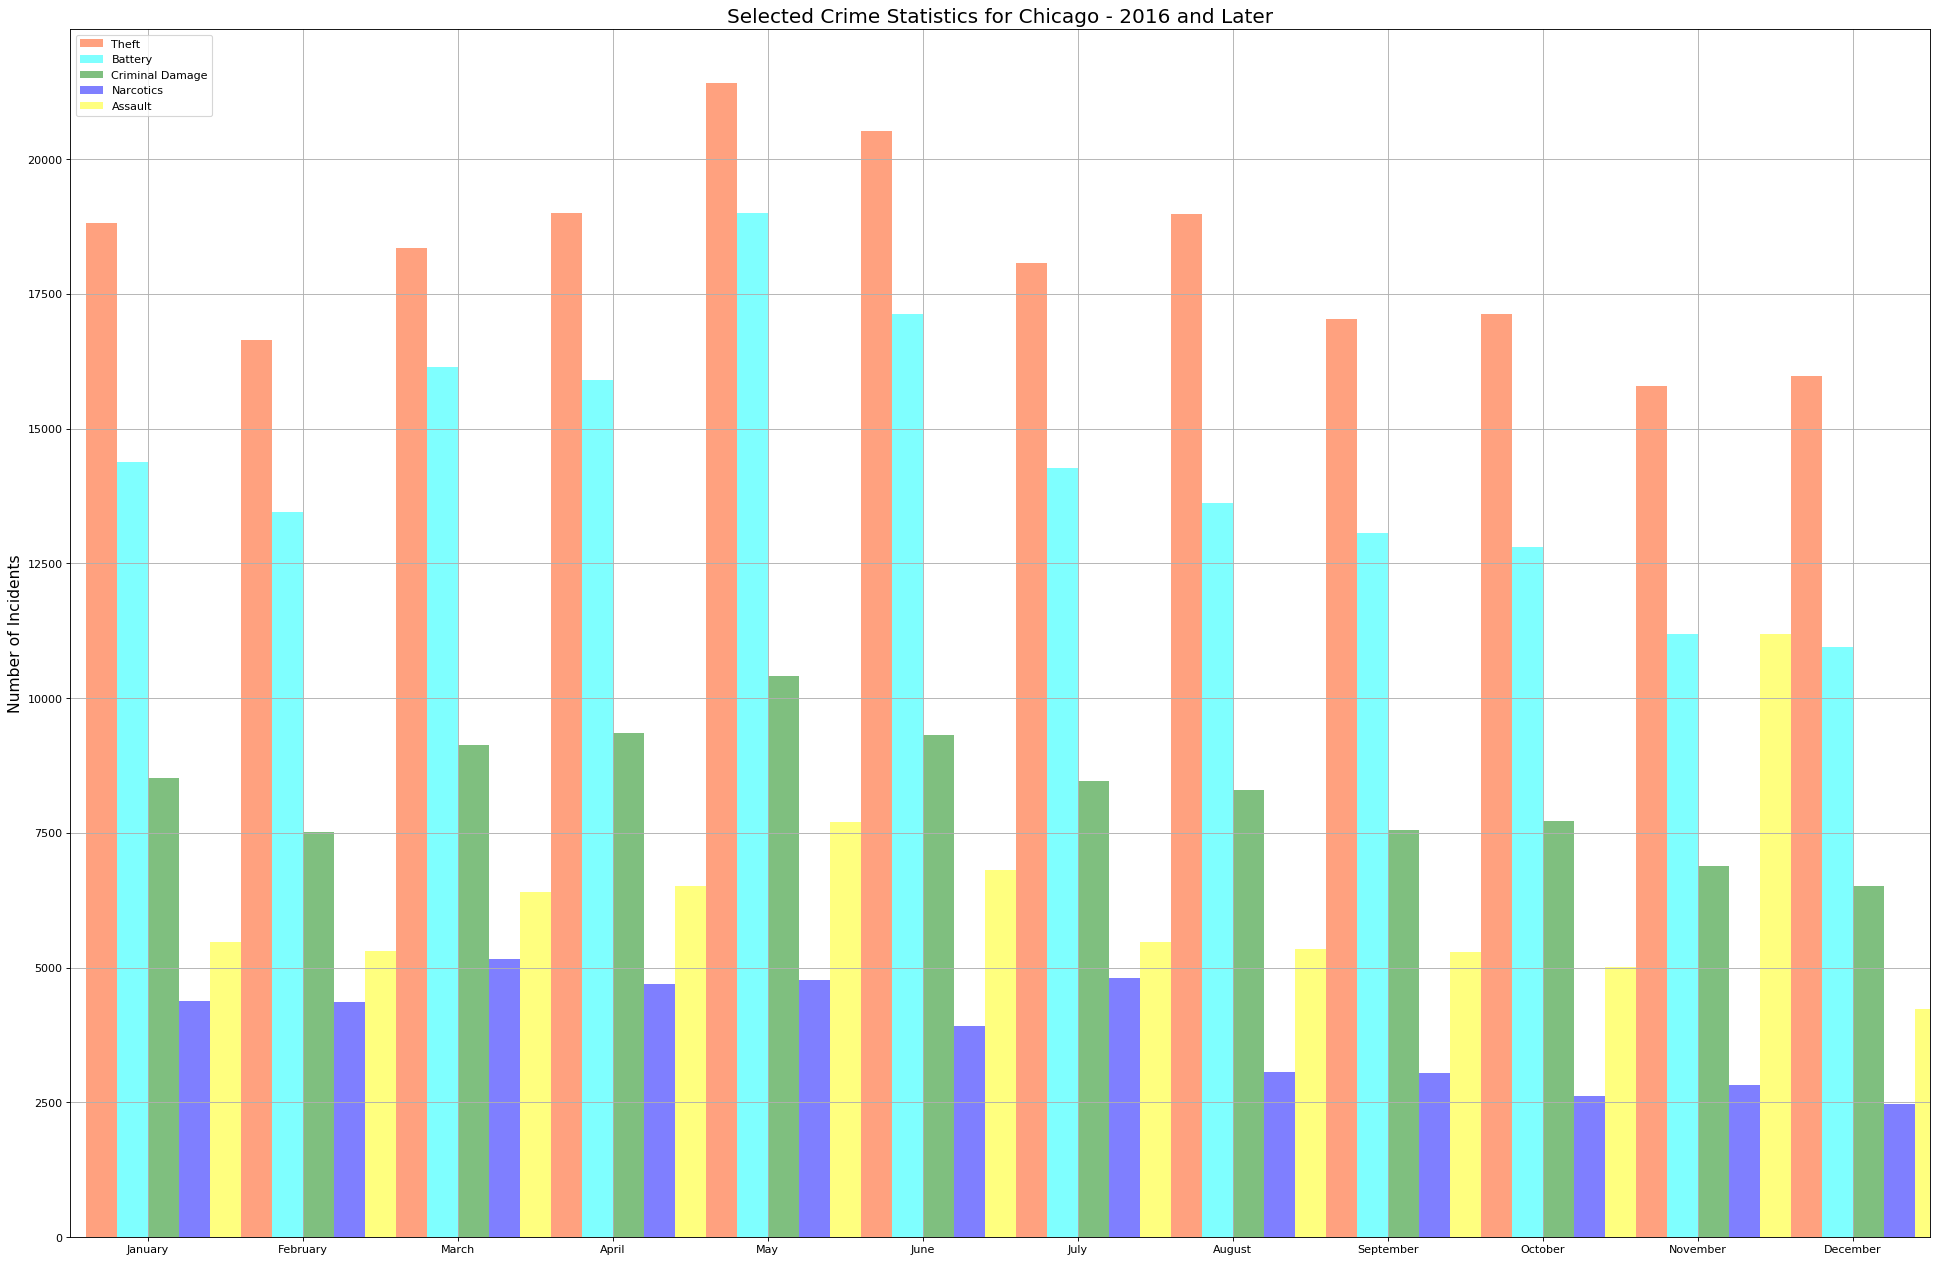

In [70]:
# Define a list "crime_legend" for legend

crime_legend = ["Theft", "Battery", "Criminal Damage", "Narcotics","Assault" ]

#Define the plot

# Setting the positions and width for the bars
pos = list(range(len(top_five_crimes_2016_and_above['Theft']))) 
width = 0.2 

# Find the highest statistic to determine the scale for y-axis
y_max = max(max(top_five_crimes_2016_and_above['Theft']), max(top_five_crimes_2016_and_above['Battery']),
                 max(top_five_crimes_2016_and_above['Criminal Damage']), max(top_five_crimes_2016_and_above['Narcotics']),
                 max(top_five_crimes_2016_and_above['Assault']))+1000

# Plotting the bars
fig, ax = plt.subplots(figsize=(30,20), dpi = 80)

# Create a bar with Theft data,
# in position pos,

plt.bar(pos, 
        #using top_five_crimes_2016_and_above['Theft'] data,
        top_five_crimes_2016_and_above['Theft'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='orangered', 
        # with label the first value in the list crime_legend
        label=crime_legend[0])

# Create a bar with Battery data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using top_five_crimes_2016_and_above['Battery'] data,
        top_five_crimes_2016_and_above['Battery'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='aqua', 
        # with label the second value in the list crime_legend
        label=crime_legend[1]) 

# Create a bar with Criminal Damage data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using top_five_crimes_2016_and_above['Criminal Damage'] data,
        top_five_crimes_2016_and_above['Criminal Damage'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='g', 
        # with label the third value in the list crime_legend
        label=crime_legend[2])

# Create a bar with Narcotics data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using top_five_crimes_2016_and_above['Narcotics'] data,
        top_five_crimes_2016_and_above['Narcotics'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='blue', 
        # with label the fifth value in the list crime_legend
        label=crime_legend[4])

# Create a bar with Assault data,
# in position pos + some width buffer,
plt.bar([p + width*4 for p in pos], 
        #using top_five_crimes_2016_and_above['Assault'] data,
        top_five_crimes_2016_and_above['Assault'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='yellow', 
        # with label the fourth value in the list crime_legend
        label=crime_legend[3])



# Set the y axis label
ax.set_ylabel('Number of Incidents', fontsize = 14)

# Set the chart's title
ax.set_title('Selected Crime Statistics for Chicago - 2016 and Later', fontsize = 18)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(top_five_crimes_2016_and_above['Month'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, y_max])

# Adding the legend and showing the plot
plt.legend(['Theft', 'Battery', 'Criminal Damage','Narcotics','Assault'], loc='upper left')
plt.grid()
plt.show()



In [71]:
# Process for 2011 to 2015

my_city_crime_data_2011_to_2015_df = my_city_crime_data_df.loc[ (my_city_crime_data_df['Year'] > 2010) & (my_city_crime_data_df['Year'] < 2016), :]

my_city_crime_data_2011_to_2015_df['Primary Type'].value_counts().index

my_city_crime_data_2011_to_2015_df['Description'].value_counts().index

#Create a DataFrame just to capture the Primary Type and their value counts

my_city_crime_primary_type_2011_to_2015_list_df = pd.DataFrame({"Primary Type":my_city_crime_data_2011_to_2015_df['Primary Type'].value_counts().index, \
                                          "Values":my_city_crime_data_2011_to_2015_df['Primary Type'].value_counts()})

#Write the above to csv for future use

my_city_crime_primary_type_2011_to_2015_list_df.to_csv("crime_primary_type_2011_to_2015.csv",index = False)

#Create a DataFrame just to capture the descriptions and their value counts

my_city_crime_description_2011_to_2015_list_df = pd.DataFrame({"Description":my_city_crime_data_2011_to_2015_df['Description'].value_counts().index, \
                                          "Values":my_city_crime_data_2011_to_2015_df['Description'].value_counts()})

#Write the above to csv for future use

my_city_crime_description_2011_to_2015_list_df.to_csv("crime_description_2011_to_2015.csv",index = False)



#Sift through the data to classify by "MONTH"

group_by_january_2011_to_2015 = my_city_crime_data_2011_to_2015_df.loc[my_city_crime_data_2011_to_2015_df['Month Name'] == "January"]

group_by_february_2011_to_2015 = my_city_crime_data_2011_to_2015_df.loc[my_city_crime_data_2011_to_2015_df['Month Name'] == "February"]

group_by_march_2011_to_2015 = my_city_crime_data_2011_to_2015_df.loc[my_city_crime_data_2011_to_2015_df['Month Name'] == "March"]

group_by_april_2011_to_2015 = my_city_crime_data_2011_to_2015_df.loc[my_city_crime_data_2011_to_2015_df['Month Name'] == "April"]

group_by_may_2011_to_2015 = my_city_crime_data_2011_to_2015_df.loc[my_city_crime_data_2011_to_2015_df['Month Name'] == "May"]

group_by_june_2011_to_2015 = my_city_crime_data_2011_to_2015_df.loc[my_city_crime_data_2011_to_2015_df['Month Name'] == "June"]

group_by_july_2011_to_2015 = my_city_crime_data_2011_to_2015_df.loc[my_city_crime_data_2011_to_2015_df['Month Name'] == "July"]

group_by_august_2011_to_2015 = my_city_crime_data_2011_to_2015_df.loc[my_city_crime_data_2011_to_2015_df['Month Name'] == "August"]

group_by_september_2011_to_2015 = my_city_crime_data_2011_to_2015_df.loc[my_city_crime_data_2011_to_2015_df['Month Name'] == "September"]

group_by_october_2011_to_2015 = my_city_crime_data_2011_to_2015_df.loc[my_city_crime_data_2011_to_2015_df['Month Name'] == "October"]

group_by_november_2011_to_2015 = my_city_crime_data_2011_to_2015_df.loc[my_city_crime_data_2011_to_2015_df['Month Name'] == "November"]

group_by_december_2011_to_2015 = my_city_crime_data_2011_to_2015_df.loc[my_city_crime_data_2011_to_2015_df['Month Name'] == "December"]


#Sift through the data for "THEFT" by "MONTH"

january_theft_2011_to_2015 = group_by_january_2011_to_2015.loc[group_by_january_2011_to_2015['Primary Type'] == "THEFT"]

january_theft_count_2011_to_2015 = january_theft_2011_to_2015["Primary Type"].count()

february_theft_2011_to_2015 = group_by_february_2011_to_2015.loc[group_by_february_2011_to_2015['Primary Type'] == "THEFT"]

february_theft_count_2011_to_2015 = february_theft_2011_to_2015["Primary Type"].count()

march_theft_2011_to_2015 = group_by_march_2011_to_2015.loc[group_by_march_2011_to_2015['Primary Type'] == "THEFT"]

march_theft_count_2011_to_2015 = march_theft_2011_to_2015["Primary Type"].count()

april_theft_2011_to_2015 = group_by_april_2011_to_2015.loc[group_by_april_2011_to_2015['Primary Type'] == "THEFT"]

april_theft_count_2011_to_2015 = april_theft_2011_to_2015["Primary Type"].count()

may_theft_2011_to_2015 = group_by_may_2011_to_2015.loc[group_by_may_2011_to_2015['Primary Type'] == "THEFT"]

may_theft_count_2011_to_2015 = may_theft_2011_to_2015["Primary Type"].count()

june_theft_2011_to_2015 = group_by_june_2011_to_2015.loc[group_by_june_2011_to_2015['Primary Type'] == "THEFT"]

june_theft_count_2011_to_2015 = june_theft_2011_to_2015["Primary Type"].count()

july_theft_2011_to_2015 = group_by_july_2011_to_2015.loc[group_by_july_2011_to_2015['Primary Type'] == "THEFT"]

july_theft_count_2011_to_2015 = july_theft_2011_to_2015["Primary Type"].count()

august_theft_2011_to_2015 = group_by_august_2011_to_2015.loc[group_by_august_2011_to_2015['Primary Type'] == "THEFT"]

august_theft_count_2011_to_2015 = august_theft_2011_to_2015["Primary Type"].count()

september_theft_2011_to_2015 = group_by_september_2011_to_2015.loc[group_by_september_2011_to_2015['Primary Type'] == "THEFT"]

september_theft_count_2011_to_2015 = september_theft_2011_to_2015["Primary Type"].count()

october_theft_2011_to_2015 = group_by_october_2011_to_2015.loc[group_by_october_2011_to_2015['Primary Type'] == "THEFT"]

october_theft_count_2011_to_2015 = october_theft_2011_to_2015["Primary Type"].count()

november_theft_2011_to_2015 = group_by_november_2011_to_2015.loc[group_by_november_2011_to_2015['Primary Type'] == "THEFT"]

november_theft_count_2011_to_2015 = november_theft_2011_to_2015["Primary Type"].count()

december_theft_2011_to_2015 = group_by_december_2011_to_2015.loc[group_by_december_2011_to_2015['Primary Type'] == "THEFT"]

december_theft_count_2011_to_2015 = december_theft_2011_to_2015["Primary Type"].count()


#Sift through the data for "BATTERY" by "MONTH"

january_battery_2011_to_2015 = group_by_january_2011_to_2015.loc[group_by_january_2011_to_2015['Primary Type'] == "BATTERY"]

january_battery_count_2011_to_2015 = january_battery_2011_to_2015["Primary Type"].count()

february_battery_2011_to_2015 = group_by_february_2011_to_2015.loc[group_by_february_2011_to_2015['Primary Type'] == "BATTERY"]

february_battery_count_2011_to_2015 = february_battery_2011_to_2015["Primary Type"].count()

march_battery_2011_to_2015 = group_by_march_2011_to_2015.loc[group_by_march_2011_to_2015['Primary Type'] == "BATTERY"]

march_battery_count_2011_to_2015 = march_battery_2011_to_2015["Primary Type"].count()

april_battery_2011_to_2015 = group_by_april_2011_to_2015.loc[group_by_april_2011_to_2015['Primary Type'] == "BATTERY"]

april_battery_count_2011_to_2015 = april_battery_2011_to_2015["Primary Type"].count()

may_battery_2011_to_2015 = group_by_may_2011_to_2015.loc[group_by_may_2011_to_2015['Primary Type'] == "BATTERY"]

may_battery_count_2011_to_2015 = may_battery_2011_to_2015["Primary Type"].count()

june_battery_2011_to_2015 = group_by_june_2011_to_2015.loc[group_by_june_2011_to_2015['Primary Type'] == "BATTERY"]

june_battery_count_2011_to_2015 = june_battery_2011_to_2015["Primary Type"].count()

july_battery_2011_to_2015 = group_by_july_2011_to_2015.loc[group_by_july_2011_to_2015['Primary Type'] == "BATTERY"]

july_battery_count_2011_to_2015 = july_battery_2011_to_2015["Primary Type"].count()

august_battery_2011_to_2015 = group_by_august_2011_to_2015.loc[group_by_august_2011_to_2015['Primary Type'] == "BATTERY"]

august_battery_count_2011_to_2015 = august_battery_2011_to_2015["Primary Type"].count()

september_battery_2011_to_2015 = group_by_september_2011_to_2015.loc[group_by_september_2011_to_2015['Primary Type'] == "BATTERY"]

september_battery_count_2011_to_2015 = september_battery_2011_to_2015["Primary Type"].count()

october_battery_2011_to_2015 = group_by_october_2011_to_2015.loc[group_by_october_2011_to_2015['Primary Type'] == "BATTERY"]

october_battery_count_2011_to_2015 = october_battery_2011_to_2015["Primary Type"].count()

november_battery_2011_to_2015 = group_by_november_2011_to_2015.loc[group_by_november_2011_to_2015['Primary Type'] == "BATTERY"]

november_battery_count_2011_to_2015 = november_battery_2011_to_2015["Primary Type"].count()

december_battery_2011_to_2015 = group_by_december_2011_to_2015.loc[group_by_december_2011_to_2015['Primary Type'] == "BATTERY"]

december_battery_count_2011_to_2015 = december_battery_2011_to_2015["Primary Type"].count()


#Sift through the data for "CRIMINAL DAMAGE" by "MONTH"

january_criminal_damage_2011_to_2015 = group_by_january_2011_to_2015.loc[group_by_january_2011_to_2015['Primary Type'] == "CRIMINAL DAMAGE"]

january_criminal_damage_count_2011_to_2015 = january_criminal_damage_2011_to_2015["Primary Type"].count()

february_criminal_damage_2011_to_2015 = group_by_february_2011_to_2015.loc[group_by_february_2011_to_2015['Primary Type'] == "CRIMINAL DAMAGE"]

february_criminal_damage_count_2011_to_2015 = february_criminal_damage_2011_to_2015["Primary Type"].count()

march_criminal_damage_2011_to_2015 = group_by_march_2011_to_2015.loc[group_by_march_2011_to_2015['Primary Type'] == "CRIMINAL DAMAGE"]

march_criminal_damage_count_2011_to_2015 = march_criminal_damage_2011_to_2015["Primary Type"].count()

april_criminal_damage_2011_to_2015 = group_by_april_2011_to_2015.loc[group_by_april_2011_to_2015['Primary Type'] == "CRIMINAL DAMAGE"]

april_criminal_damage_count_2011_to_2015 = april_criminal_damage_2011_to_2015["Primary Type"].count()

may_criminal_damage_2011_to_2015 = group_by_may_2011_to_2015.loc[group_by_may_2011_to_2015['Primary Type'] == "CRIMINAL DAMAGE"]

may_criminal_damage_count_2011_to_2015 = may_criminal_damage_2011_to_2015["Primary Type"].count()

june_criminal_damage_2011_to_2015 = group_by_june_2011_to_2015.loc[group_by_june_2011_to_2015['Primary Type'] == "CRIMINAL DAMAGE"]

june_criminal_damage_count_2011_to_2015 = june_criminal_damage_2011_to_2015["Primary Type"].count()

july_criminal_damage_2011_to_2015 = group_by_july_2011_to_2015.loc[group_by_july_2011_to_2015['Primary Type'] == "CRIMINAL DAMAGE"]

july_criminal_damage_count_2011_to_2015 = july_criminal_damage_2011_to_2015["Primary Type"].count()

august_criminal_damage_2011_to_2015 = group_by_august_2011_to_2015.loc[group_by_august_2011_to_2015['Primary Type'] == "CRIMINAL DAMAGE"]

august_criminal_damage_count_2011_to_2015 = august_criminal_damage_2011_to_2015["Primary Type"].count()

september_criminal_damage_2011_to_2015 = group_by_september_2011_to_2015.loc[group_by_september_2011_to_2015['Primary Type'] == "CRIMINAL DAMAGE"]

september_criminal_damage_count_2011_to_2015 = september_criminal_damage_2011_to_2015["Primary Type"].count()

october_criminal_damage_2011_to_2015 = group_by_october_2011_to_2015.loc[group_by_october_2011_to_2015['Primary Type'] == "CRIMINAL DAMAGE"]

october_criminal_damage_count_2011_to_2015 = october_criminal_damage_2011_to_2015["Primary Type"].count()

november_criminal_damage_2011_to_2015 = group_by_november_2011_to_2015.loc[group_by_november_2011_to_2015['Primary Type'] == "CRIMINAL DAMAGE"]

november_criminal_damage_count_2011_to_2015 = november_criminal_damage_2011_to_2015["Primary Type"].count()

december_criminal_damage_2011_to_2015 = group_by_december_2011_to_2015.loc[group_by_december_2011_to_2015['Primary Type'] == "CRIMINAL DAMAGE"]

december_criminal_damage_count_2011_to_2015 = december_criminal_damage_2011_to_2015["Primary Type"].count()


#Sift through the data for "NARCOTICS" by "MONTH"

january_narcotics_2011_to_2015 = group_by_january_2011_to_2015.loc[group_by_january_2011_to_2015['Primary Type'] == "NARCOTICS"]

january_narcotics_count_2011_to_2015 = january_narcotics_2011_to_2015["Primary Type"].count()

february_narcotics_2011_to_2015 = group_by_february_2011_to_2015.loc[group_by_february_2011_to_2015['Primary Type'] == "NARCOTICS"]

february_narcotics_count_2011_to_2015 = february_narcotics_2011_to_2015["Primary Type"].count()

march_narcotics_2011_to_2015 = group_by_march_2011_to_2015.loc[group_by_march_2011_to_2015['Primary Type'] == "NARCOTICS"]

march_narcotics_count_2011_to_2015 = march_narcotics_2011_to_2015["Primary Type"].count()

april_narcotics_2011_to_2015 = group_by_april_2011_to_2015.loc[group_by_april_2011_to_2015['Primary Type'] == "NARCOTICS"]

april_narcotics_count_2011_to_2015 = april_narcotics_2011_to_2015["Primary Type"].count()

may_narcotics_2011_to_2015 = group_by_may_2011_to_2015.loc[group_by_may_2011_to_2015['Primary Type'] == "NARCOTICS"]

may_narcotics_count_2011_to_2015 = may_narcotics_2011_to_2015["Primary Type"].count()

june_narcotics_2011_to_2015 = group_by_june_2011_to_2015.loc[group_by_june_2011_to_2015['Primary Type'] == "NARCOTICS"]

june_narcotics_count_2011_to_2015 = june_narcotics_2011_to_2015["Primary Type"].count()

july_narcotics_2011_to_2015 = group_by_july_2011_to_2015.loc[group_by_july_2011_to_2015['Primary Type'] == "NARCOTICS"]

july_narcotics_count_2011_to_2015 = july_narcotics_2011_to_2015["Primary Type"].count()

august_narcotics_2011_to_2015 = group_by_august_2011_to_2015.loc[group_by_august_2011_to_2015['Primary Type'] == "NARCOTICS"]

august_narcotics_count_2011_to_2015 = august_narcotics_2011_to_2015["Primary Type"].count()

september_narcotics_2011_to_2015 = group_by_september_2011_to_2015.loc[group_by_september_2011_to_2015['Primary Type'] == "NARCOTICS"]

september_narcotics_count_2011_to_2015 = september_narcotics_2011_to_2015["Primary Type"].count()

october_narcotics_2011_to_2015 = group_by_october_2011_to_2015.loc[group_by_october_2011_to_2015['Primary Type'] == "NARCOTICS"]

october_narcotics_count_2011_to_2015 = october_narcotics_2011_to_2015["Primary Type"].count()

november_narcotics_2011_to_2015 = group_by_november_2011_to_2015.loc[group_by_november_2011_to_2015['Primary Type'] == "NARCOTICS"]

november_narcotics_count_2011_to_2015 = november_narcotics_2011_to_2015["Primary Type"].count()

december_narcotics_2011_to_2015 = group_by_december_2011_to_2015.loc[group_by_december_2011_to_2015['Primary Type'] == "NARCOTICS"]

december_narcotics_count_2011_to_2015 = december_narcotics_2011_to_2015["Primary Type"].count()


#Sift through the data for "ASSAULT" by "MONTH"

january_assault_2011_to_2015 = group_by_january_2011_to_2015.loc[group_by_january_2011_to_2015['Primary Type'] == "ASSAULT"]

january_assault_count_2011_to_2015 = january_assault_2011_to_2015["Primary Type"].count()

february_assault_2011_to_2015 = group_by_february_2011_to_2015.loc[group_by_february_2011_to_2015['Primary Type'] == "ASSAULT"]

february_assault_count_2011_to_2015 = february_assault_2011_to_2015["Primary Type"].count()

march_assault_2011_to_2015 = group_by_march_2011_to_2015.loc[group_by_march_2011_to_2015['Primary Type'] == "ASSAULT"]

march_assault_count_2011_to_2015 = march_assault_2011_to_2015["Primary Type"].count()

april_assault_2011_to_2015 = group_by_april_2011_to_2015.loc[group_by_april_2011_to_2015['Primary Type'] == "ASSAULT"]

april_assault_count_2011_to_2015 = april_assault_2011_to_2015["Primary Type"].count()

may_assault_2011_to_2015 = group_by_may_2011_to_2015.loc[group_by_may_2011_to_2015['Primary Type'] == "ASSAULT"]

may_assault_count_2011_to_2015 = may_assault_2011_to_2015["Primary Type"].count()

june_assault_2011_to_2015 = group_by_june_2011_to_2015.loc[group_by_june_2011_to_2015['Primary Type'] == "ASSAULT"]

june_assault_count_2011_to_2015 = june_assault_2011_to_2015["Primary Type"].count()

july_assault_2011_to_2015 = group_by_july_2011_to_2015.loc[group_by_july_2011_to_2015['Primary Type'] == "ASSAULT"]

july_assault_count_2011_to_2015 = july_assault_2011_to_2015["Primary Type"].count()

august_assault_2011_to_2015 = group_by_august_2011_to_2015.loc[group_by_august_2011_to_2015['Primary Type'] == "ASSAULT"]

august_assault_count_2011_to_2015 = august_assault_2011_to_2015["Primary Type"].count()

september_assault_2011_to_2015 = group_by_september_2011_to_2015.loc[group_by_september_2011_to_2015['Primary Type'] == "ASSAULT"]

september_assault_count_2011_to_2015 = september_assault_2011_to_2015["Primary Type"].count()

october_assault_2011_to_2015 = group_by_october_2011_to_2015.loc[group_by_october_2011_to_2015['Primary Type'] == "ASSAULT"]

october_assault_count_2011_to_2015 = october_assault_2011_to_2015["Primary Type"].count()

november_assault_2011_to_2015 = group_by_november_2011_to_2015.loc[group_by_november_2011_to_2015['Primary Type'] == "ASSAULT"]

november_assault_count_2011_to_2015 = november_battery_2011_to_2015["Primary Type"].count()

december_assault_2011_to_2015 = group_by_december_2011_to_2015.loc[group_by_december_2011_to_2015['Primary Type'] == "ASSAULT"]

december_assault_count_2011_to_2015 = december_assault_2011_to_2015["Primary Type"].count()


# specify an array month to hold names of each month

month = ["January","February","March","April","May","June","July","August","September","October","November","December"]

# specify an array theft_2011_to_2015 to hold counts of "theft" for each month

theft_2011_to_2015 = [january_theft_count_2011_to_2015, february_theft_count_2011_to_2015, march_theft_count_2011_to_2015, april_theft_count_2011_to_2015, \
                       may_theft_count_2011_to_2015, june_theft_count_2011_to_2015, july_theft_count_2011_to_2015, august_theft_count_2011_to_2015, \
                       september_theft_count_2011_to_2015, october_theft_count_2011_to_2015, november_theft_count_2011_to_2015, december_theft_count_2011_to_2015]

# specify an array battery_2011_to_2015 to hold counts of "battery" for each month

battery_2011_to_2015 = [january_battery_count_2011_to_2015, february_battery_count_2011_to_2015, march_battery_count_2011_to_2015, april_battery_count_2011_to_2015, \
                       may_battery_count_2011_to_2015, june_battery_count_2011_to_2015, july_battery_count_2011_to_2015, august_battery_count_2011_to_2015, \
                       september_battery_count_2011_to_2015, october_battery_count_2011_to_2015, november_battery_count_2011_to_2015, december_battery_count_2011_to_2015]

# specify an array criminal_damage_2011_to_2015 to hold counts of "criminal damage" for each month

criminal_damage_2011_to_2015 = [january_criminal_damage_count_2011_to_2015, february_criminal_damage_count_2011_to_2015, march_criminal_damage_count_2011_to_2015, april_criminal_damage_count_2011_to_2015, \
                       may_criminal_damage_count_2011_to_2015, june_criminal_damage_count_2011_to_2015, july_criminal_damage_count_2011_to_2015, august_criminal_damage_count_2011_to_2015, \
                       september_criminal_damage_count_2011_to_2015, october_criminal_damage_count_2011_to_2015, november_criminal_damage_count_2011_to_2015, december_criminal_damage_count_2011_to_2015]

# specify an array narcotics_2011_to_2015 to hold counts of "narcotics" for each month

narcotics_2011_to_2015 = [january_narcotics_count_2011_to_2015, february_narcotics_count_2011_to_2015, march_narcotics_count_2011_to_2015, april_narcotics_count_2011_to_2015, \
                       may_narcotics_count_2011_to_2015, june_narcotics_count_2011_to_2015, july_narcotics_count_2011_to_2015, august_narcotics_count_2011_to_2015, \
                       september_narcotics_count_2011_to_2015, october_narcotics_count_2011_to_2015, november_narcotics_count_2011_to_2015, december_narcotics_count_2011_to_2015]


# specify an array assault_2011_to_2015 to hold counts of "assault" for each month

assault_2011_to_2015 = [january_assault_count_2011_to_2015, february_assault_count_2011_to_2015, march_assault_count_2011_to_2015, april_assault_count_2011_to_2015, \
                       may_assault_count_2011_to_2015, june_assault_count_2011_to_2015, july_assault_count_2011_to_2015, august_assault_count_2011_to_2015, \
                       september_assault_count_2011_to_2015, october_assault_count_2011_to_2015, november_assault_count_2011_to_2015, december_assault_count_2011_to_2015]



#define a dataframe that will store all these statistics

top_five_crimes_2011_to_2015 = pd.DataFrame({"Month":month,"Theft":theft_2011_to_2015,"Battery":battery_2011_to_2015,
                                             "Criminal Damage":criminal_damage_2011_to_2015, "Narcotics":narcotics_2011_to_2015,
                                             "Assault":assault_2011_to_2015})

top_five_crimes_2011_to_2015

,Month,Theft,Battery,Criminal Damage,Narcotics,Assault
0,January,25449,19542,11512,14227,6338
1,February,21044,17310,9721,13635,5894
2,March,25704,22936,13057,15704,7763
3,April,26984,22725,14046,13919,7834
4,May,29530,26548,14863,13807,9068
5,June,31244,26555,14766,13199,8872
6,July,33478,26813,15350,14236,8815
7,August,33130,25223,14612,13949,8670
8,September,30385,22762,13567,12968,8151
9,October,29994,22364,13931,12745,7876


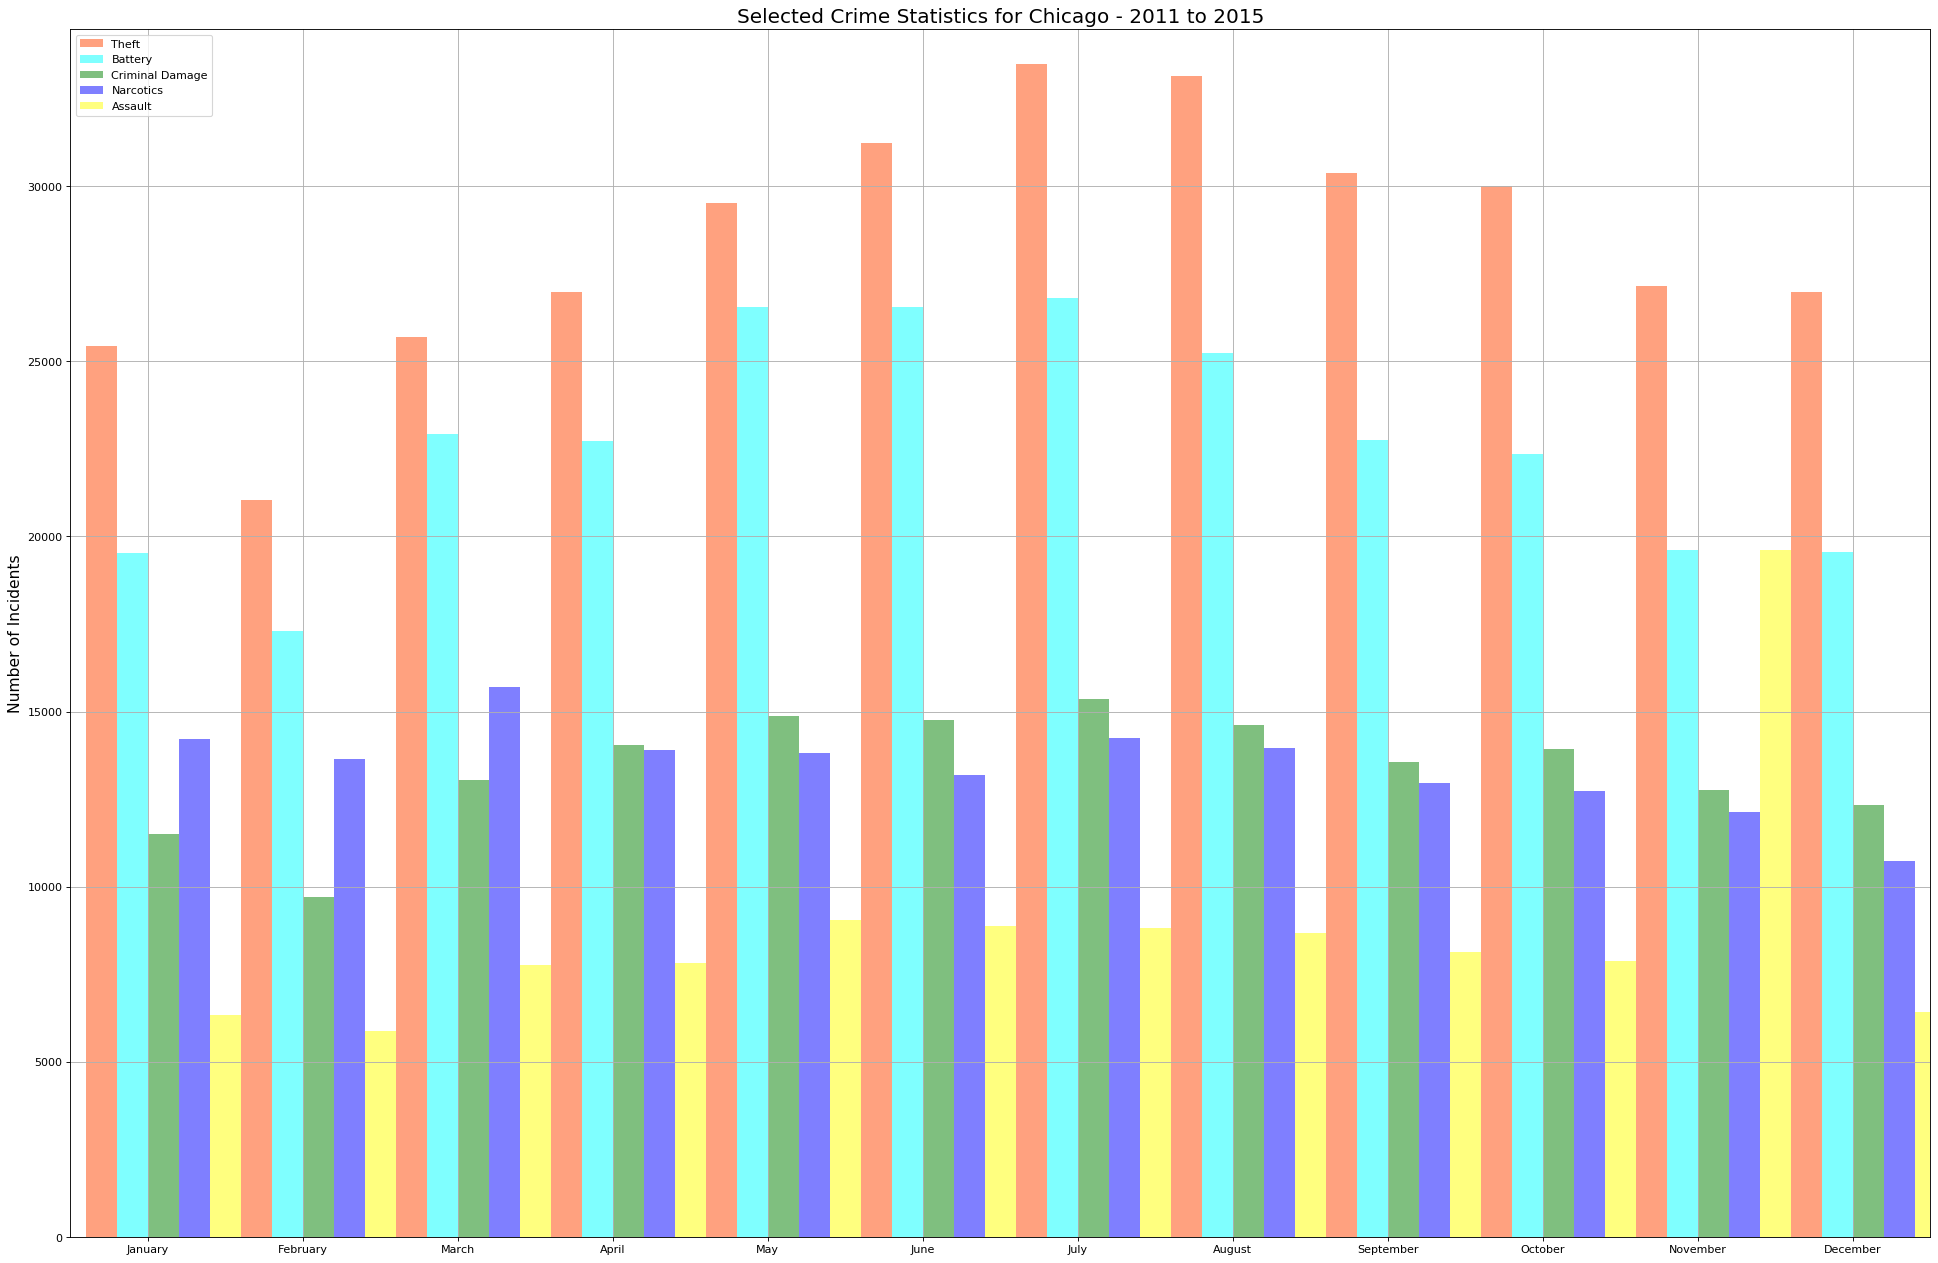

In [72]:
# Define a list "crime_legend" for legend

crime_legend = ["Theft", "Battery", "Criminal Damage", "Narcotics", "Assault"]

#Define the plot

# Setting the positions and width for the bars
pos = list(range(len(top_five_crimes_2011_to_2015['Theft']))) 
width = 0.2 

# Find the highest statistic to determine the scale for y-axis
y_max = max(max(top_five_crimes_2011_to_2015['Theft']), max(top_five_crimes_2011_to_2015['Battery']),
                 max(top_five_crimes_2011_to_2015['Criminal Damage']), max(top_five_crimes_2011_to_2015['Narcotics']),
                 max(top_five_crimes_2011_to_2015['Assault']))+1000

# Plotting the bars
fig, ax = plt.subplots(figsize=(30,20), dpi = 80)

# Create a bar with Theft data,
# in position pos,

plt.bar(pos, 
        #using top_five_crimes_2011_to_2015['Theft'] data,
        top_five_crimes_2011_to_2015['Theft'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='orangered', 
        # with label the first value in the list crime_legend
        label=crime_legend[0])

# Create a bar with Battery data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using top_five_crimes_2011_to_2015['Battery'] data,
        top_five_crimes_2011_to_2015['Battery'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='aqua', 
        # with label the second value in the list crime_legend
        label=crime_legend[1]) 

# Create a bar with Criminal Damage data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using top_five_crimes_2011_to_2015['Criminal Damage'] data,
        top_five_crimes_2011_to_2015['Criminal Damage'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='g', 
        # with label the third value in the list crime_legend
        label=crime_legend[2])

# Create a bar with Narcotics data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using top_five_crimes_2011_to_2015['Narcotics'] data,
        top_five_crimes_2011_to_2015['Narcotics'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='blue', 
        # with label the fifth value in the list crime_legend
        label=crime_legend[4])

# Create a bar with Assault data,
# in position pos + some width buffer,
plt.bar([p + width*4 for p in pos], 
        #using top_five_crimes_2011_to_2015['Assault'] data,
        top_five_crimes_2011_to_2015['Assault'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='yellow', 
        # with label the fourth value in the list crime_legend
        label=crime_legend[3])

# Set the y axis label
ax.set_ylabel('Number of Incidents', fontsize = 14)

# Set the chart's title
ax.set_title('Selected Crime Statistics for Chicago - 2011 to 2015', fontsize = 18)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(top_five_crimes_2011_to_2015['Month'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, y_max])

# Adding the legend and showing the plot
plt.legend(['Theft', 'Battery', 'Criminal Damage','Narcotics','Assault'], loc='upper left')
plt.grid()
plt.show()


In [73]:
# Process for 2006 to 2010

my_city_crime_data_2006_to_2010_df = my_city_crime_data_df.loc[ (my_city_crime_data_df['Year'] > 2005) & (my_city_crime_data_df['Year'] < 2011), :]

my_city_crime_data_2006_to_2010_df['Primary Type'].value_counts().index

my_city_crime_data_2006_to_2010_df['Description'].value_counts().index


#Create a DataFrame just to capture the Primary Type and their value counts

my_city_crime_primary_type_2006_to_2010_list_df = pd.DataFrame({"Primary Type":my_city_crime_data_2006_to_2010_df['Primary Type'].value_counts().index, \
                                          "Values":my_city_crime_data_2006_to_2010_df['Primary Type'].value_counts()})

#Write the above to csv for future use

my_city_crime_primary_type_2006_to_2010_list_df.to_csv("crime_primary_type_2006_to_2010.csv",index = False)

#Create a DataFrame just to capture the descriptions and their value counts

my_city_crime_description_2006_to_2010_list_df = pd.DataFrame({"Description":my_city_crime_data_2006_to_2010_df['Description'].value_counts().index, \
                                          "Values":my_city_crime_data_2006_to_2010_df['Description'].value_counts()})

#Write the above to csv for future use

my_city_crime_description_2006_to_2010_list_df.to_csv("crime_description_2006_to_2010.csv",index = False)


#Sift through the data to classify by "MONTH"

group_by_january_2006_to_2010 = my_city_crime_data_2006_to_2010_df.loc[my_city_crime_data_2006_to_2010_df['Month Name'] == "January"]

group_by_february_2006_to_2010 = my_city_crime_data_2006_to_2010_df.loc[my_city_crime_data_2006_to_2010_df['Month Name'] == "February"]

group_by_march_2006_to_2010 = my_city_crime_data_2006_to_2010_df.loc[my_city_crime_data_2006_to_2010_df['Month Name'] == "March"]

group_by_april_2006_to_2010 = my_city_crime_data_2006_to_2010_df.loc[my_city_crime_data_2006_to_2010_df['Month Name'] == "April"]

group_by_may_2006_to_2010 = my_city_crime_data_2006_to_2010_df.loc[my_city_crime_data_2006_to_2010_df['Month Name'] == "May"]

group_by_june_2006_to_2010 = my_city_crime_data_2006_to_2010_df.loc[my_city_crime_data_2006_to_2010_df['Month Name'] == "June"]

group_by_july_2006_to_2010 = my_city_crime_data_2006_to_2010_df.loc[my_city_crime_data_2006_to_2010_df['Month Name'] == "July"]

group_by_august_2006_to_2010 = my_city_crime_data_2006_to_2010_df.loc[my_city_crime_data_2006_to_2010_df['Month Name'] == "August"]

group_by_september_2006_to_2010 = my_city_crime_data_2006_to_2010_df.loc[my_city_crime_data_2006_to_2010_df['Month Name'] == "September"]

group_by_october_2006_to_2010 = my_city_crime_data_2006_to_2010_df.loc[my_city_crime_data_2006_to_2010_df['Month Name'] == "October"]

group_by_november_2006_to_2010 = my_city_crime_data_2006_to_2010_df.loc[my_city_crime_data_2006_to_2010_df['Month Name'] == "November"]

group_by_december_2006_to_2010 = my_city_crime_data_2006_to_2010_df.loc[my_city_crime_data_2006_to_2010_df['Month Name'] == "December"]


#Sift through the data for "THEFT" by "MONTH"

january_theft_2006_to_2010 = group_by_january_2006_to_2010.loc[group_by_january_2006_to_2010['Primary Type'] == "THEFT"]

january_theft_count_2006_to_2010 = january_theft_2006_to_2010["Primary Type"].count()

february_theft_2006_to_2010 = group_by_february_2006_to_2010.loc[group_by_february_2006_to_2010['Primary Type'] == "THEFT"]

february_theft_count_2006_to_2010 = february_theft_2006_to_2010["Primary Type"].count()

march_theft_2006_to_2010 = group_by_march_2006_to_2010.loc[group_by_march_2006_to_2010['Primary Type'] == "THEFT"]

march_theft_count_2006_to_2010 = march_theft_2006_to_2010["Primary Type"].count()

april_theft_2006_to_2010 = group_by_april_2006_to_2010.loc[group_by_april_2006_to_2010['Primary Type'] == "THEFT"]

april_theft_count_2006_to_2010 = april_theft_2006_to_2010["Primary Type"].count()

may_theft_2006_to_2010 = group_by_may_2006_to_2010.loc[group_by_may_2006_to_2010['Primary Type'] == "THEFT"]

may_theft_count_2006_to_2010 = may_theft_2006_to_2010["Primary Type"].count()

june_theft_2006_to_2010 = group_by_june_2006_to_2010.loc[group_by_june_2006_to_2010['Primary Type'] == "THEFT"]

june_theft_count_2006_to_2010 = june_theft_2006_to_2010["Primary Type"].count()

july_theft_2006_to_2010 = group_by_july_2006_to_2010.loc[group_by_july_2006_to_2010['Primary Type'] == "THEFT"]

july_theft_count_2006_to_2010 = july_theft_2006_to_2010["Primary Type"].count()

august_theft_2006_to_2010 = group_by_august_2006_to_2010.loc[group_by_august_2006_to_2010['Primary Type'] == "THEFT"]

august_theft_count_2006_to_2010 = august_theft_2006_to_2010["Primary Type"].count()

september_theft_2006_to_2010 = group_by_september_2006_to_2010.loc[group_by_september_2006_to_2010['Primary Type'] == "THEFT"]

september_theft_count_2006_to_2010 = september_theft_2006_to_2010["Primary Type"].count()

october_theft_2006_to_2010 = group_by_october_2006_to_2010.loc[group_by_october_2006_to_2010['Primary Type'] == "THEFT"]

october_theft_count_2006_to_2010 = october_theft_2006_to_2010["Primary Type"].count()

november_theft_2006_to_2010 = group_by_november_2006_to_2010.loc[group_by_november_2006_to_2010['Primary Type'] == "THEFT"]

november_theft_count_2006_to_2010 = november_theft_2006_to_2010["Primary Type"].count()

december_theft_2006_to_2010 = group_by_december_2006_to_2010.loc[group_by_december_2006_to_2010['Primary Type'] == "THEFT"]

december_theft_count_2006_to_2010 = december_theft_2006_to_2010["Primary Type"].count()


#Sift through the data for "BATTERY" by "MONTH"

january_battery_2006_to_2010 = group_by_january_2006_to_2010.loc[group_by_january_2006_to_2010['Primary Type'] == "BATTERY"]

january_battery_count_2006_to_2010 = january_battery_2006_to_2010["Primary Type"].count()

february_battery_2006_to_2010 = group_by_february_2006_to_2010.loc[group_by_february_2006_to_2010['Primary Type'] == "BATTERY"]

february_battery_count_2006_to_2010 = february_battery_2006_to_2010["Primary Type"].count()

march_battery_2006_to_2010 = group_by_march_2006_to_2010.loc[group_by_march_2006_to_2010['Primary Type'] == "BATTERY"]

march_battery_count_2006_to_2010 = march_battery_2006_to_2010["Primary Type"].count()

april_battery_2006_to_2010 = group_by_april_2006_to_2010.loc[group_by_april_2006_to_2010['Primary Type'] == "BATTERY"]

april_battery_count_2006_to_2010 = april_battery_2006_to_2010["Primary Type"].count()

may_battery_2006_to_2010 = group_by_may_2006_to_2010.loc[group_by_may_2006_to_2010['Primary Type'] == "BATTERY"]

may_battery_count_2006_to_2010 = may_battery_2006_to_2010["Primary Type"].count()

june_battery_2006_to_2010 = group_by_june_2006_to_2010.loc[group_by_june_2006_to_2010['Primary Type'] == "BATTERY"]

june_battery_count_2006_to_2010 = june_battery_2006_to_2010["Primary Type"].count()

july_battery_2006_to_2010 = group_by_july_2006_to_2010.loc[group_by_july_2006_to_2010['Primary Type'] == "BATTERY"]

july_battery_count_2006_to_2010 = july_battery_2006_to_2010["Primary Type"].count()

august_battery_2006_to_2010 = group_by_august_2006_to_2010.loc[group_by_august_2006_to_2010['Primary Type'] == "BATTERY"]

august_battery_count_2006_to_2010 = august_battery_2006_to_2010["Primary Type"].count()

september_battery_2006_to_2010 = group_by_september_2006_to_2010.loc[group_by_september_2006_to_2010['Primary Type'] == "BATTERY"]

september_battery_count_2006_to_2010 = september_battery_2006_to_2010["Primary Type"].count()

october_battery_2006_to_2010 = group_by_october_2006_to_2010.loc[group_by_october_2006_to_2010['Primary Type'] == "BATTERY"]

october_battery_count_2006_to_2010 = october_battery_2006_to_2010["Primary Type"].count()

november_battery_2006_to_2010 = group_by_november_2006_to_2010.loc[group_by_november_2006_to_2010['Primary Type'] == "BATTERY"]

november_battery_count_2006_to_2010 = november_battery_2006_to_2010["Primary Type"].count()

december_battery_2006_to_2010 = group_by_december_2006_to_2010.loc[group_by_december_2006_to_2010['Primary Type'] == "BATTERY"]

december_battery_count_2006_to_2010 = december_battery_2006_to_2010["Primary Type"].count()


#Sift through the data for "CRIMINAL DAMAGE" by "MONTH"

january_criminal_damage_2006_to_2010 = group_by_january_2006_to_2010.loc[group_by_january_2006_to_2010['Primary Type'] == "CRIMINAL DAMAGE"]

january_criminal_damage_count_2006_to_2010 = january_criminal_damage_2006_to_2010["Primary Type"].count()

february_criminal_damage_2006_to_2010 = group_by_february_2006_to_2010.loc[group_by_february_2006_to_2010['Primary Type'] == "CRIMINAL DAMAGE"]

february_criminal_damage_count_2006_to_2010 = february_criminal_damage_2006_to_2010["Primary Type"].count()

march_criminal_damage_2006_to_2010 = group_by_march_2006_to_2010.loc[group_by_march_2006_to_2010['Primary Type'] == "CRIMINAL DAMAGE"]

march_criminal_damage_count_2006_to_2010 = march_criminal_damage_2006_to_2010["Primary Type"].count()

april_criminal_damage_2006_to_2010 = group_by_april_2006_to_2010.loc[group_by_april_2006_to_2010['Primary Type'] == "CRIMINAL DAMAGE"]

april_criminal_damage_count_2006_to_2010 = april_criminal_damage_2006_to_2010["Primary Type"].count()

may_criminal_damage_2006_to_2010 = group_by_may_2006_to_2010.loc[group_by_may_2006_to_2010['Primary Type'] == "CRIMINAL DAMAGE"]

may_criminal_damage_count_2006_to_2010 = may_criminal_damage_2006_to_2010["Primary Type"].count()

june_criminal_damage_2006_to_2010 = group_by_june_2006_to_2010.loc[group_by_june_2006_to_2010['Primary Type'] == "CRIMINAL DAMAGE"]

june_criminal_damage_count_2006_to_2010 = june_criminal_damage_2006_to_2010["Primary Type"].count()

july_criminal_damage_2006_to_2010 = group_by_july_2006_to_2010.loc[group_by_july_2006_to_2010['Primary Type'] == "CRIMINAL DAMAGE"]

july_criminal_damage_count_2006_to_2010 = july_criminal_damage_2006_to_2010["Primary Type"].count()

august_criminal_damage_2006_to_2010 = group_by_august_2006_to_2010.loc[group_by_august_2006_to_2010['Primary Type'] == "CRIMINAL DAMAGE"]

august_criminal_damage_count_2006_to_2010 = august_criminal_damage_2006_to_2010["Primary Type"].count()

september_criminal_damage_2006_to_2010 = group_by_september_2006_to_2010.loc[group_by_september_2006_to_2010['Primary Type'] == "CRIMINAL DAMAGE"]

september_criminal_damage_count_2006_to_2010 = september_criminal_damage_2006_to_2010["Primary Type"].count()

october_criminal_damage_2006_to_2010 = group_by_october_2006_to_2010.loc[group_by_october_2006_to_2010['Primary Type'] == "CRIMINAL DAMAGE"]

october_criminal_damage_count_2006_to_2010 = october_criminal_damage_2006_to_2010["Primary Type"].count()

november_criminal_damage_2006_to_2010 = group_by_november_2006_to_2010.loc[group_by_november_2006_to_2010['Primary Type'] == "CRIMINAL DAMAGE"]

november_criminal_damage_count_2006_to_2010 = november_criminal_damage_2006_to_2010["Primary Type"].count()

december_criminal_damage_2006_to_2010 = group_by_december_2006_to_2010.loc[group_by_december_2006_to_2010['Primary Type'] == "CRIMINAL DAMAGE"]

december_criminal_damage_count_2006_to_2010 = december_criminal_damage_2006_to_2010["Primary Type"].count()


#Sift through the data for "NARCOTICS" by "MONTH"

january_narcotics_2006_to_2010 = group_by_january_2006_to_2010.loc[group_by_january_2006_to_2010['Primary Type'] == "NARCOTICS"]

january_narcotics_count_2006_to_2010 = january_narcotics_2006_to_2010["Primary Type"].count()

february_narcotics_2006_to_2010 = group_by_february_2006_to_2010.loc[group_by_february_2006_to_2010['Primary Type'] == "NARCOTICS"]

february_narcotics_count_2006_to_2010 = february_narcotics_2006_to_2010["Primary Type"].count()

march_narcotics_2006_to_2010 = group_by_march_2006_to_2010.loc[group_by_march_2006_to_2010['Primary Type'] == "NARCOTICS"]

march_narcotics_count_2006_to_2010 = march_narcotics_2006_to_2010["Primary Type"].count()

april_narcotics_2006_to_2010 = group_by_april_2006_to_2010.loc[group_by_april_2006_to_2010['Primary Type'] == "NARCOTICS"]

april_narcotics_count_2006_to_2010 = april_narcotics_2006_to_2010["Primary Type"].count()

may_narcotics_2006_to_2010 = group_by_may_2006_to_2010.loc[group_by_may_2006_to_2010['Primary Type'] == "NARCOTICS"]

may_narcotics_count_2006_to_2010 = may_narcotics_2006_to_2010["Primary Type"].count()

june_narcotics_2006_to_2010 = group_by_june_2006_to_2010.loc[group_by_june_2006_to_2010['Primary Type'] == "NARCOTICS"]

june_narcotics_count_2006_to_2010 = june_narcotics_2006_to_2010["Primary Type"].count()

july_narcotics_2006_to_2010 = group_by_july_2006_to_2010.loc[group_by_july_2006_to_2010['Primary Type'] == "NARCOTICS"]

july_narcotics_count_2006_to_2010 = july_narcotics_2006_to_2010["Primary Type"].count()

august_narcotics_2006_to_2010 = group_by_august_2006_to_2010.loc[group_by_august_2006_to_2010['Primary Type'] == "NARCOTICS"]

august_narcotics_count_2006_to_2010 = august_narcotics_2006_to_2010["Primary Type"].count()

september_narcotics_2006_to_2010 = group_by_september_2006_to_2010.loc[group_by_september_2006_to_2010['Primary Type'] == "NARCOTICS"]

september_narcotics_count_2006_to_2010 = september_narcotics_2006_to_2010["Primary Type"].count()

october_narcotics_2006_to_2010 = group_by_october_2006_to_2010.loc[group_by_october_2006_to_2010['Primary Type'] == "NARCOTICS"]

october_narcotics_count_2006_to_2010 = october_narcotics_2006_to_2010["Primary Type"].count()

november_narcotics_2006_to_2010 = group_by_november_2006_to_2010.loc[group_by_november_2006_to_2010['Primary Type'] == "NARCOTICS"]

november_narcotics_count_2006_to_2010 = november_narcotics_2006_to_2010["Primary Type"].count()

december_narcotics_2006_to_2010 = group_by_december_2006_to_2010.loc[group_by_december_2006_to_2010['Primary Type'] == "NARCOTICS"]

december_narcotics_count_2006_to_2010 = december_narcotics_2006_to_2010["Primary Type"].count()


#Sift through the data for "ASSAULT" by "MONTH"

january_assault_2006_to_2010 = group_by_january_2006_to_2010.loc[group_by_january_2006_to_2010['Primary Type'] == "ASSAULT"]

january_assault_count_2006_to_2010 = january_assault_2006_to_2010["Primary Type"].count()

february_assault_2006_to_2010 = group_by_february_2006_to_2010.loc[group_by_february_2006_to_2010['Primary Type'] == "ASSAULT"]

february_assault_count_2006_to_2010 = february_assault_2006_to_2010["Primary Type"].count()

march_assault_2006_to_2010 = group_by_march_2006_to_2010.loc[group_by_march_2006_to_2010['Primary Type'] == "ASSAULT"]

march_assault_count_2006_to_2010 = march_assault_2006_to_2010["Primary Type"].count()

april_assault_2006_to_2010 = group_by_april_2006_to_2010.loc[group_by_april_2006_to_2010['Primary Type'] == "ASSAULT"]

april_assault_count_2006_to_2010 = april_assault_2006_to_2010["Primary Type"].count()

may_assault_2006_to_2010 = group_by_may_2006_to_2010.loc[group_by_may_2006_to_2010['Primary Type'] == "ASSAULT"]

may_assault_count_2006_to_2010 = may_assault_2006_to_2010["Primary Type"].count()

june_assault_2006_to_2010 = group_by_june_2006_to_2010.loc[group_by_june_2006_to_2010['Primary Type'] == "ASSAULT"]

june_assault_count_2006_to_2010 = june_assault_2006_to_2010["Primary Type"].count()

july_assault_2006_to_2010 = group_by_july_2006_to_2010.loc[group_by_july_2006_to_2010['Primary Type'] == "ASSAULT"]

july_assault_count_2006_to_2010 = july_assault_2006_to_2010["Primary Type"].count()

august_assault_2006_to_2010 = group_by_august_2006_to_2010.loc[group_by_august_2006_to_2010['Primary Type'] == "ASSAULT"]

august_assault_count_2006_to_2010 = august_assault_2006_to_2010["Primary Type"].count()

september_assault_2006_to_2010 = group_by_september_2006_to_2010.loc[group_by_september_2006_to_2010['Primary Type'] == "ASSAULT"]

september_assault_count_2006_to_2010 = september_assault_2006_to_2010["Primary Type"].count()

october_assault_2006_to_2010 = group_by_october_2006_to_2010.loc[group_by_october_2006_to_2010['Primary Type'] == "ASSAULT"]

october_assault_count_2006_to_2010 = october_assault_2006_to_2010["Primary Type"].count()

november_assault_2006_to_2010 = group_by_november_2006_to_2010.loc[group_by_november_2006_to_2010['Primary Type'] == "ASSAULT"]

november_assault_count_2006_to_2010 = november_battery_2006_to_2010["Primary Type"].count()

december_assault_2006_to_2010 = group_by_december_2006_to_2010.loc[group_by_december_2006_to_2010['Primary Type'] == "ASSAULT"]

december_assault_count_2006_to_2010 = december_assault_2006_to_2010["Primary Type"].count()


# specify an array month to hold names of each month

month = ["January","February","March","April","May","June","July","August","September","October","November","December"]

# specify an array theft_2006_to_2010 to hold counts of "theft" for each month

theft_2006_to_2010 = [january_theft_count_2006_to_2010, february_theft_count_2006_to_2010, march_theft_count_2006_to_2010, april_theft_count_2006_to_2010, \
                       may_theft_count_2006_to_2010, june_theft_count_2006_to_2010, july_theft_count_2006_to_2010, august_theft_count_2006_to_2010, \
                       september_theft_count_2006_to_2010, october_theft_count_2006_to_2010, november_theft_count_2006_to_2010, december_theft_count_2006_to_2010]

# specify an array battery_2006_to_2010 to hold counts of "battery" for each month

battery_2006_to_2010 = [january_battery_count_2006_to_2010, february_battery_count_2006_to_2010, march_battery_count_2006_to_2010, april_battery_count_2006_to_2010, \
                       may_battery_count_2006_to_2010, june_battery_count_2006_to_2010, july_battery_count_2006_to_2010, august_battery_count_2006_to_2010, \
                       september_battery_count_2006_to_2010, october_battery_count_2006_to_2010, november_battery_count_2006_to_2010, december_battery_count_2006_to_2010]

# specify an array criminal_damage_2006_to_2010 to hold counts of "criminal damage" for each month

criminal_damage_2006_to_2010 = [january_criminal_damage_count_2006_to_2010, february_criminal_damage_count_2006_to_2010, march_criminal_damage_count_2006_to_2010, april_criminal_damage_count_2006_to_2010, \
                       may_criminal_damage_count_2006_to_2010, june_criminal_damage_count_2006_to_2010, july_criminal_damage_count_2006_to_2010, august_criminal_damage_count_2006_to_2010, \
                       september_criminal_damage_count_2006_to_2010, october_criminal_damage_count_2006_to_2010, november_criminal_damage_count_2006_to_2010, december_criminal_damage_count_2006_to_2010]

# specify an array narcotics_2006_to_2010 to hold counts of "narcotics" for each month

narcotics_2006_to_2010 = [january_narcotics_count_2006_to_2010, february_narcotics_count_2006_to_2010, march_narcotics_count_2006_to_2010, april_narcotics_count_2006_to_2010, \
                       may_narcotics_count_2006_to_2010, june_narcotics_count_2006_to_2010, july_narcotics_count_2006_to_2010, august_narcotics_count_2006_to_2010, \
                       september_narcotics_count_2006_to_2010, october_narcotics_count_2006_to_2010, november_narcotics_count_2006_to_2010, december_narcotics_count_2006_to_2010]

# specify an array assault_2006_to_2010 to hold counts of "assault" for each month

assault_2006_to_2010 = [january_assault_count_2006_to_2010, february_assault_count_2006_to_2010, march_assault_count_2006_to_2010, april_assault_count_2006_to_2010, \
                       may_assault_count_2006_to_2010, june_assault_count_2006_to_2010, july_assault_count_2006_to_2010, august_assault_count_2006_to_2010, \
                       september_assault_count_2006_to_2010, october_assault_count_2006_to_2010, november_assault_count_2006_to_2010, december_assault_count_2006_to_2010]


#define a dataframe that will store all these statistics

top_five_crimes_2006_to_2010 = pd.DataFrame({"Month":month,"Theft":theft_2006_to_2010,"Battery":battery_2006_to_2010,
                                             "Criminal Damage":criminal_damage_2006_to_2010, "Narcotics":assault_2006_to_2010,
                                             "Assault":deceptive_practice_2006_to_2010})

top_five_crimes_2006_to_2010

,Month,Theft,Battery,Criminal Damage,Narcotics,Assault
0,January,32828,26740,18460,8606,5880
1,February,26244,24725,15609,8194,4913
2,March,32510,32211,21385,10483,5822
3,April,33182,32096,21723,10789,5694
4,May,35894,36306,23232,12058,5679
5,June,36610,35540,22390,11314,5989
6,July,40490,35562,23692,11657,6021
7,August,40085,33287,23689,11170,6094
8,September,37239,31726,21301,10797,5690
9,October,37836,30564,23239,10363,5844


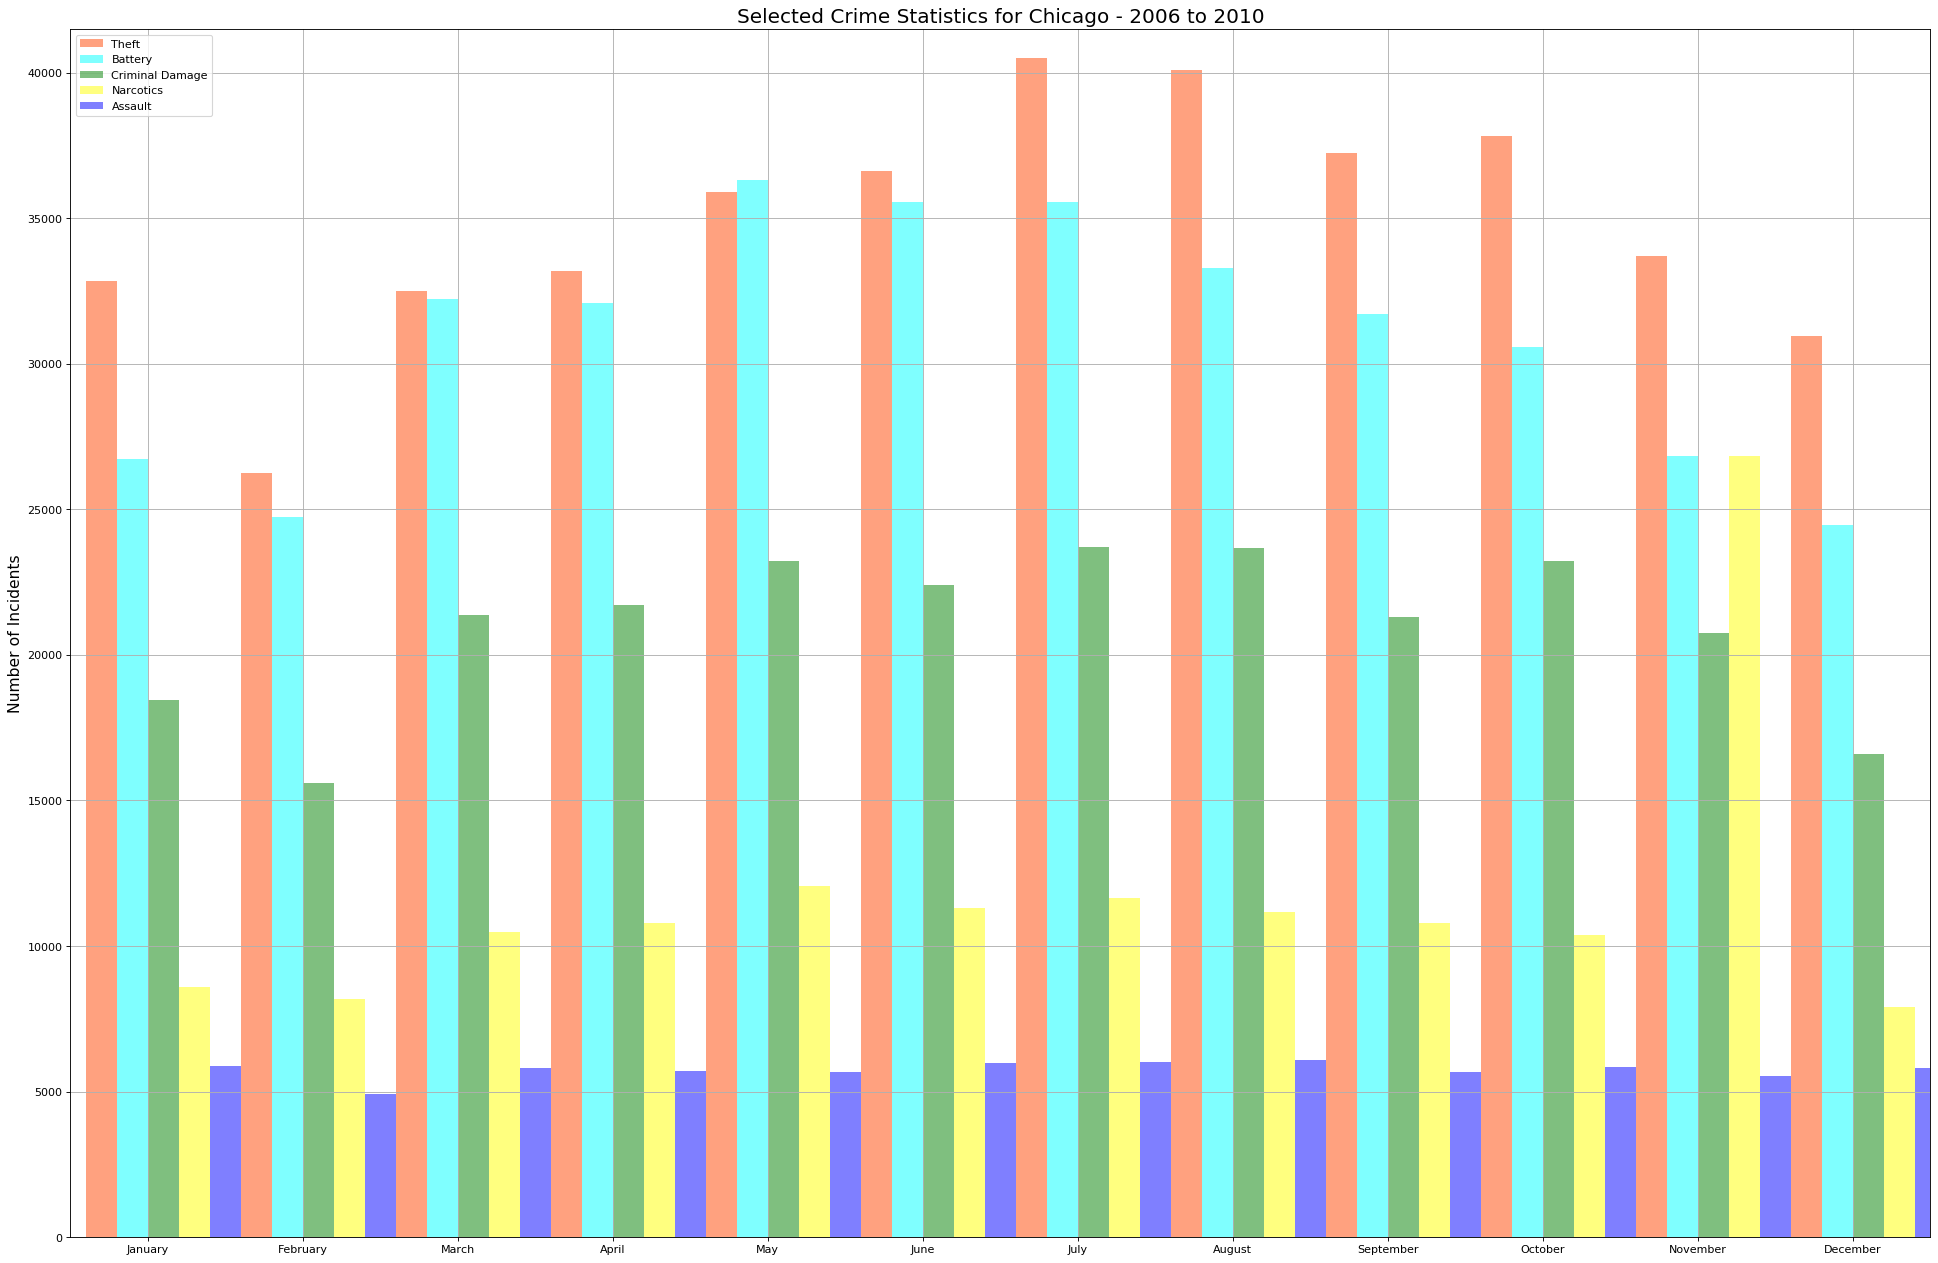

In [74]:
# Define a list "crime_legend" for legend

crime_legend = ["Theft", "Battery", "Criminal Damage", "Narcotics", "Assault"]

#Define the plot

# Setting the positions and width for the bars
pos = list(range(len(top_five_crimes_2006_to_2010['Theft']))) 
width = 0.2 

# Find the highest statistic to determine the scale for y-axis
y_max = max(max(top_five_crimes_2006_to_2010['Theft']), max(top_five_crimes_2006_to_2010['Battery']),
                 max(top_five_crimes_2006_to_2010['Criminal Damage']), max(top_five_crimes_2006_to_2010['Narcotics']),
                 max(top_five_crimes_2006_to_2010['Assault']))+1000

# Plotting the bars
fig, ax = plt.subplots(figsize=(30,20), dpi = 80)

# Create a bar with Theft data,
# in position pos,

plt.bar(pos, 
        #using top_five_crimes_2006_to_2010['Theft'] data,
        top_five_crimes_2006_to_2010['Theft'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='orangered', 
        # with label the first value in the list crime_legend
        label=crime_legend[0])

# Create a bar with Battery data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using top_five_crimes_2006_to_2010['Battery'] data,
        top_five_crimes_2006_to_2010['Battery'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='aqua', 
        # with label the second value in the list crime_legend
        label=crime_legend[1]) 

# Create a bar with Criminal Damage data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using top_five_crimes_2006_to_2010['Criminal Damage'] data,
        top_five_crimes_2006_to_2010['Criminal Damage'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='g', 
        # with label the third value in the list crime_legend
        label=crime_legend[2])

# Create a bar with Narcotics data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using top_five_crimes_2006_to_2010['Narcotics'] data,
        top_five_crimes_2006_to_2010['Narcotics'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='yellow', 
        # with label the fourth value in the list crime_legend
        label=crime_legend[3])

# Create a bar with Assault data,
# in position pos + some width buffer,
plt.bar([p + width*4 for p in pos], 
        #using top_five_crimes_2006_to_2010['Assult'] data,
        top_five_crimes_2006_to_2010['Assault'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='blue', 
        # with label the fifth value in the list crime_legend
        label=crime_legend[4])

# Set the y axis label
ax.set_ylabel('Number of Incidents', fontsize = 14)

# Set the chart's title
ax.set_title('Selected Crime Statistics for Chicago - 2006 to 2010', fontsize = 18)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(top_five_crimes_2006_to_2010['Month'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, y_max])

# Adding the legend and showing the plot
plt.legend(['Theft', 'Battery', 'Criminal Damage','Narcotics','Assault'], loc='upper left')
plt.grid()
plt.show()

In [75]:
# Process for 2001 to 2005

my_city_crime_data_2001_to_2005_df = my_city_crime_data_df.loc[ (my_city_crime_data_df['Year'] > 2000) & (my_city_crime_data_df['Year'] < 2006), :]

my_city_crime_data_2001_to_2005_df['Primary Type'].value_counts().index

my_city_crime_data_2001_to_2005_df['Description'].value_counts().index

#Create a DataFrame just to capture the Primary Type and their value counts

my_city_crime_primary_type_2001_to_2005_list_df = pd.DataFrame({"Primary Type":my_city_crime_data_2001_to_2005_df['Primary Type'].value_counts().index, \
                                          "Values":my_city_crime_data_2001_to_2005_df['Primary Type'].value_counts()})

#Write the above to csv for future use

my_city_crime_primary_type_2001_to_2005_list_df.to_csv("crime_primary_type_2001_to_2005.csv",index = False)

#Create a DataFrame just to capture the descriptions and their value counts

my_city_crime_description_2001_to_2005_list_df = pd.DataFrame({"Description":my_city_crime_data_2001_to_2005_df['Description'].value_counts().index, \
                                          "Values":my_city_crime_data_2001_to_2005_df['Description'].value_counts()})

#Write the above to csv for future use

my_city_crime_description_2001_to_2005_list_df.to_csv("crime_description_2001_to_2005.csv",index = False)


#Sift through the data to classify by "MONTH"

group_by_january_2001_to_2005 = my_city_crime_data_2001_to_2005_df.loc[my_city_crime_data_2001_to_2005_df['Month Name'] == "January"]

group_by_february_2001_to_2005 = my_city_crime_data_2001_to_2005_df.loc[my_city_crime_data_2001_to_2005_df['Month Name'] == "February"]

group_by_march_2001_to_2005 = my_city_crime_data_2001_to_2005_df.loc[my_city_crime_data_2001_to_2005_df['Month Name'] == "March"]

group_by_april_2001_to_2005 = my_city_crime_data_2001_to_2005_df.loc[my_city_crime_data_2001_to_2005_df['Month Name'] == "April"]

group_by_may_2001_to_2005 = my_city_crime_data_2001_to_2005_df.loc[my_city_crime_data_2001_to_2005_df['Month Name'] == "May"]

group_by_june_2001_to_2005 = my_city_crime_data_2001_to_2005_df.loc[my_city_crime_data_2001_to_2005_df['Month Name'] == "June"]

group_by_july_2001_to_2005 = my_city_crime_data_2001_to_2005_df.loc[my_city_crime_data_2001_to_2005_df['Month Name'] == "July"]

group_by_august_2001_to_2005 = my_city_crime_data_2001_to_2005_df.loc[my_city_crime_data_2001_to_2005_df['Month Name'] == "August"]

group_by_september_2001_to_2005 = my_city_crime_data_2001_to_2005_df.loc[my_city_crime_data_2001_to_2005_df['Month Name'] == "September"]

group_by_october_2001_to_2005 = my_city_crime_data_2001_to_2005_df.loc[my_city_crime_data_2001_to_2005_df['Month Name'] == "October"]

group_by_november_2001_to_2005 = my_city_crime_data_2001_to_2005_df.loc[my_city_crime_data_2001_to_2005_df['Month Name'] == "November"]

group_by_december_2001_to_2005 = my_city_crime_data_2001_to_2005_df.loc[my_city_crime_data_2001_to_2005_df['Month Name'] == "December"]


#Sift through the data for "THEFT" by "MONTH"

january_theft_2001_to_2005 = group_by_january_2001_to_2005.loc[group_by_january_2001_to_2005['Primary Type'] == "THEFT"]

january_theft_count_2001_to_2005 = january_theft_2001_to_2005["Primary Type"].count()

february_theft_2001_to_2005 = group_by_february_2001_to_2005.loc[group_by_february_2001_to_2005['Primary Type'] == "THEFT"]

february_theft_count_2001_to_2005 = february_theft_2001_to_2005["Primary Type"].count()

march_theft_2001_to_2005 = group_by_march_2001_to_2005.loc[group_by_march_2001_to_2005['Primary Type'] == "THEFT"]

march_theft_count_2001_to_2005 = march_theft_2001_to_2005["Primary Type"].count()

april_theft_2001_to_2005 = group_by_april_2001_to_2005.loc[group_by_april_2001_to_2005['Primary Type'] == "THEFT"]

april_theft_count_2001_to_2005 = april_theft_2001_to_2005["Primary Type"].count()

may_theft_2001_to_2005 = group_by_may_2001_to_2005.loc[group_by_may_2001_to_2005['Primary Type'] == "THEFT"]

may_theft_count_2001_to_2005 = may_theft_2001_to_2005["Primary Type"].count()

june_theft_2001_to_2005 = group_by_june_2001_to_2005.loc[group_by_june_2001_to_2005['Primary Type'] == "THEFT"]

june_theft_count_2001_to_2005 = june_theft_2001_to_2005["Primary Type"].count()

july_theft_2001_to_2005 = group_by_july_2001_to_2005.loc[group_by_july_2001_to_2005['Primary Type'] == "THEFT"]

july_theft_count_2001_to_2005 = july_theft_2001_to_2005["Primary Type"].count()

august_theft_2001_to_2005 = group_by_august_2001_to_2005.loc[group_by_august_2001_to_2005['Primary Type'] == "THEFT"]

august_theft_count_2001_to_2005 = august_theft_2001_to_2005["Primary Type"].count()

september_theft_2001_to_2005 = group_by_september_2001_to_2005.loc[group_by_september_2001_to_2005['Primary Type'] == "THEFT"]

september_theft_count_2001_to_2005 = september_theft_2001_to_2005["Primary Type"].count()

october_theft_2001_to_2005 = group_by_october_2001_to_2005.loc[group_by_october_2001_to_2005['Primary Type'] == "THEFT"]

october_theft_count_2001_to_2005 = october_theft_2001_to_2005["Primary Type"].count()

november_theft_2001_to_2005 = group_by_november_2001_to_2005.loc[group_by_november_2001_to_2005['Primary Type'] == "THEFT"]

november_theft_count_2001_to_2005 = november_theft_2001_to_2005["Primary Type"].count()

december_theft_2001_to_2005 = group_by_december_2001_to_2005.loc[group_by_december_2001_to_2005['Primary Type'] == "THEFT"]

december_theft_count_2001_to_2005 = december_theft_2001_to_2005["Primary Type"].count()


#Sift through the data for "BATTERY" by "MONTH"

january_battery_2001_to_2005 = group_by_january_2001_to_2005.loc[group_by_january_2001_to_2005['Primary Type'] == "BATTERY"]

january_battery_count_2001_to_2005 = january_battery_2001_to_2005["Primary Type"].count()

february_battery_2001_to_2005 = group_by_february_2001_to_2005.loc[group_by_february_2001_to_2005['Primary Type'] == "BATTERY"]

february_battery_count_2001_to_2005 = february_battery_2001_to_2005["Primary Type"].count()

march_battery_2001_to_2005 = group_by_march_2001_to_2005.loc[group_by_march_2001_to_2005['Primary Type'] == "BATTERY"]

march_battery_count_2001_to_2005 = march_battery_2001_to_2005["Primary Type"].count()

april_battery_2001_to_2005 = group_by_april_2001_to_2005.loc[group_by_april_2001_to_2005['Primary Type'] == "BATTERY"]

april_battery_count_2001_to_2005 = april_battery_2001_to_2005["Primary Type"].count()

may_battery_2001_to_2005 = group_by_may_2001_to_2005.loc[group_by_may_2001_to_2005['Primary Type'] == "BATTERY"]

may_battery_count_2001_to_2005 = may_battery_2001_to_2005["Primary Type"].count()

june_battery_2001_to_2005 = group_by_june_2001_to_2005.loc[group_by_june_2001_to_2005['Primary Type'] == "BATTERY"]

june_battery_count_2001_to_2005 = june_battery_2001_to_2005["Primary Type"].count()

july_battery_2001_to_2005 = group_by_july_2001_to_2005.loc[group_by_july_2001_to_2005['Primary Type'] == "BATTERY"]

july_battery_count_2001_to_2005 = july_battery_2001_to_2005["Primary Type"].count()

august_battery_2001_to_2005 = group_by_august_2001_to_2005.loc[group_by_august_2001_to_2005['Primary Type'] == "BATTERY"]

august_battery_count_2001_to_2005 = august_battery_2001_to_2005["Primary Type"].count()

september_battery_2001_to_2005 = group_by_september_2001_to_2005.loc[group_by_september_2001_to_2005['Primary Type'] == "BATTERY"]

september_battery_count_2001_to_2005 = september_battery_2001_to_2005["Primary Type"].count()

october_battery_2001_to_2005 = group_by_october_2001_to_2005.loc[group_by_october_2001_to_2005['Primary Type'] == "BATTERY"]

october_battery_count_2001_to_2005 = october_battery_2001_to_2005["Primary Type"].count()

november_battery_2001_to_2005 = group_by_november_2001_to_2005.loc[group_by_november_2001_to_2005['Primary Type'] == "BATTERY"]

november_battery_count_2001_to_2005 = november_battery_2001_to_2005["Primary Type"].count()

december_battery_2001_to_2005 = group_by_december_2001_to_2005.loc[group_by_december_2001_to_2005['Primary Type'] == "BATTERY"]

december_battery_count_2001_to_2005 = december_battery_2001_to_2005["Primary Type"].count()


#Sift through the data for "CRIMINAL DAMAGE" by "MONTH"

january_criminal_damage_2001_to_2005 = group_by_january_2001_to_2005.loc[group_by_january_2001_to_2005['Primary Type'] == "CRIMINAL DAMAGE"]

january_criminal_damage_count_2001_to_2005 = january_criminal_damage_2001_to_2005["Primary Type"].count()

february_criminal_damage_2001_to_2005 = group_by_february_2001_to_2005.loc[group_by_february_2001_to_2005['Primary Type'] == "CRIMINAL DAMAGE"]

february_criminal_damage_count_2001_to_2005 = february_criminal_damage_2001_to_2005["Primary Type"].count()

march_criminal_damage_2001_to_2005 = group_by_march_2001_to_2005.loc[group_by_march_2001_to_2005['Primary Type'] == "CRIMINAL DAMAGE"]

march_criminal_damage_count_2001_to_2005 = march_criminal_damage_2001_to_2005["Primary Type"].count()

april_criminal_damage_2001_to_2005 = group_by_april_2001_to_2005.loc[group_by_april_2001_to_2005['Primary Type'] == "CRIMINAL DAMAGE"]

april_criminal_damage_count_2001_to_2005 = april_criminal_damage_2001_to_2005["Primary Type"].count()

may_criminal_damage_2001_to_2005 = group_by_may_2001_to_2005.loc[group_by_may_2001_to_2005['Primary Type'] == "CRIMINAL DAMAGE"]

may_criminal_damage_count_2001_to_2005 = may_criminal_damage_2001_to_2005["Primary Type"].count()

june_criminal_damage_2001_to_2005 = group_by_june_2001_to_2005.loc[group_by_june_2001_to_2005['Primary Type'] == "CRIMINAL DAMAGE"]

june_criminal_damage_count_2001_to_2005 = june_criminal_damage_2001_to_2005["Primary Type"].count()

july_criminal_damage_2001_to_2005 = group_by_july_2001_to_2005.loc[group_by_july_2001_to_2005['Primary Type'] == "CRIMINAL DAMAGE"]

july_criminal_damage_count_2001_to_2005 = july_criminal_damage_2001_to_2005["Primary Type"].count()

august_criminal_damage_2001_to_2005 = group_by_august_2001_to_2005.loc[group_by_august_2001_to_2005['Primary Type'] == "CRIMINAL DAMAGE"]

august_criminal_damage_count_2001_to_2005 = august_criminal_damage_2001_to_2005["Primary Type"].count()

september_criminal_damage_2001_to_2005 = group_by_september_2001_to_2005.loc[group_by_september_2001_to_2005['Primary Type'] == "CRIMINAL DAMAGE"]

september_criminal_damage_count_2001_to_2005 = september_criminal_damage_2001_to_2005["Primary Type"].count()

october_criminal_damage_2001_to_2005 = group_by_october_2001_to_2005.loc[group_by_october_2001_to_2005['Primary Type'] == "CRIMINAL DAMAGE"]

october_criminal_damage_count_2001_to_2005 = october_criminal_damage_2001_to_2005["Primary Type"].count()

november_criminal_damage_2001_to_2005 = group_by_november_2001_to_2005.loc[group_by_november_2001_to_2005['Primary Type'] == "CRIMINAL DAMAGE"]

november_criminal_damage_count_2001_to_2005 = november_criminal_damage_2001_to_2005["Primary Type"].count()

december_criminal_damage_2001_to_2005 = group_by_december_2001_to_2005.loc[group_by_december_2001_to_2005['Primary Type'] == "CRIMINAL DAMAGE"]

december_criminal_damage_count_2001_to_2005 = december_criminal_damage_2001_to_2005["Primary Type"].count()


#Sift through the data for "NARCOTICS" by "MONTH"

january_narcotics_2001_to_2005 = group_by_january_2001_to_2005.loc[group_by_january_2001_to_2005['Primary Type'] == "NARCOTICS"]

january_narcotics_count_2001_to_2005 = january_narcotics_2001_to_2005["Primary Type"].count()

february_narcotics_2001_to_2005 = group_by_february_2001_to_2005.loc[group_by_february_2001_to_2005['Primary Type'] == "NARCOTICS"]

february_narcotics_count_2001_to_2005 = february_narcotics_2001_to_2005["Primary Type"].count()

march_narcotics_2001_to_2005 = group_by_march_2001_to_2005.loc[group_by_march_2001_to_2005['Primary Type'] == "NARCOTICS"]

march_narcotics_count_2001_to_2005 = march_narcotics_2001_to_2005["Primary Type"].count()

april_narcotics_2001_to_2005 = group_by_april_2001_to_2005.loc[group_by_april_2001_to_2005['Primary Type'] == "NARCOTICS"]

april_narcotics_count_2001_to_2005 = april_narcotics_2001_to_2005["Primary Type"].count()

may_narcotics_2001_to_2005 = group_by_may_2001_to_2005.loc[group_by_may_2001_to_2005['Primary Type'] == "NARCOTICS"]

may_narcotics_count_2001_to_2005 = may_narcotics_2001_to_2005["Primary Type"].count()

june_narcotics_2001_to_2005 = group_by_june_2001_to_2005.loc[group_by_june_2001_to_2005['Primary Type'] == "NARCOTICS"]

june_narcotics_count_2001_to_2005 = june_narcotics_2001_to_2005["Primary Type"].count()

july_narcotics_2001_to_2005 = group_by_july_2001_to_2005.loc[group_by_july_2001_to_2005['Primary Type'] == "NARCOTICS"]

july_narcotics_count_2001_to_2005 = july_narcotics_2001_to_2005["Primary Type"].count()

august_narcotics_2001_to_2005 = group_by_august_2001_to_2005.loc[group_by_august_2001_to_2005['Primary Type'] == "NARCOTICS"]

august_narcotics_count_2001_to_2005 = august_narcotics_2001_to_2005["Primary Type"].count()

september_narcotics_2001_to_2005 = group_by_september_2001_to_2005.loc[group_by_september_2001_to_2005['Primary Type'] == "NARCOTICS"]

september_narcotics_count_2001_to_2005 = september_narcotics_2001_to_2005["Primary Type"].count()

october_narcotics_2001_to_2005 = group_by_october_2001_to_2005.loc[group_by_october_2001_to_2005['Primary Type'] == "NARCOTICS"]

october_narcotics_count_2001_to_2005 = october_narcotics_2001_to_2005["Primary Type"].count()

november_narcotics_2001_to_2005 = group_by_november_2001_to_2005.loc[group_by_november_2001_to_2005['Primary Type'] == "NARCOTICS"]

november_narcotics_count_2001_to_2005 = november_narcotics_2001_to_2005["Primary Type"].count()

december_narcotics_2001_to_2005 = group_by_december_2001_to_2005.loc[group_by_december_2001_to_2005['Primary Type'] == "NARCOTICS"]

december_narcotics_count_2001_to_2005 = december_narcotics_2001_to_2005["Primary Type"].count()


#Sift through the data for "ASSAULT" by "MONTH"

january_assault_2001_to_2005 = group_by_january_2001_to_2005.loc[group_by_january_2001_to_2005['Primary Type'] == "ASSAULT"]

january_assault_count_2001_to_2005 = january_assault_2001_to_2005["Primary Type"].count()

february_assault_2001_to_2005 = group_by_february_2001_to_2005.loc[group_by_february_2001_to_2005['Primary Type'] == "ASSAULT"]

february_assault_count_2001_to_2005 = february_assault_2001_to_2005["Primary Type"].count()

march_assault_2001_to_2005 = group_by_march_2001_to_2005.loc[group_by_march_2001_to_2005['Primary Type'] == "ASSAULT"]

march_assault_count_2001_to_2005 = march_assault_2001_to_2005["Primary Type"].count()

april_assault_2001_to_2005 = group_by_april_2001_to_2005.loc[group_by_april_2001_to_2005['Primary Type'] == "ASSAULT"]

april_assault_count_2001_to_2005 = april_assault_2001_to_2005["Primary Type"].count()

may_assault_2001_to_2005 = group_by_may_2001_to_2005.loc[group_by_may_2001_to_2005['Primary Type'] == "ASSAULT"]

may_assault_count_2001_to_2005 = may_assault_2001_to_2005["Primary Type"].count()

june_assault_2001_to_2005 = group_by_june_2001_to_2005.loc[group_by_june_2001_to_2005['Primary Type'] == "ASSAULT"]

june_assault_count_2001_to_2005 = june_assault_2001_to_2005["Primary Type"].count()

july_assault_2001_to_2005 = group_by_july_2001_to_2005.loc[group_by_july_2001_to_2005['Primary Type'] == "ASSAULT"]

july_assault_count_2001_to_2005 = july_assault_2001_to_2005["Primary Type"].count()

august_assault_2001_to_2005 = group_by_august_2001_to_2005.loc[group_by_august_2001_to_2005['Primary Type'] == "ASSAULT"]

august_assault_count_2001_to_2005 = august_assault_2001_to_2005["Primary Type"].count()

september_assault_2001_to_2005 = group_by_september_2001_to_2005.loc[group_by_september_2001_to_2005['Primary Type'] == "ASSAULT"]

september_assault_count_2001_to_2005 = september_assault_2001_to_2005["Primary Type"].count()

october_assault_2001_to_2005 = group_by_october_2001_to_2005.loc[group_by_october_2001_to_2005['Primary Type'] == "ASSAULT"]

october_assault_count_2001_to_2005 = october_assault_2001_to_2005["Primary Type"].count()

november_assault_2001_to_2005 = group_by_november_2001_to_2005.loc[group_by_november_2001_to_2005['Primary Type'] == "ASSAULT"]

november_assault_count_2001_to_2005 = november_battery_2001_to_2005["Primary Type"].count()

december_assault_2001_to_2005 = group_by_december_2001_to_2005.loc[group_by_december_2001_to_2005['Primary Type'] == "ASSAULT"]

december_assault_count_2001_to_2005 = december_assault_2001_to_2005["Primary Type"].count()


# specify an array month to hold names of each month

month = ["January","February","March","April","May","June","July","August","September","October","November","December"]

# specify an array theft_2001_to_2005 to hold counts of "theft" for each month

theft_2001_to_2005 = [january_theft_count_2001_to_2005, february_theft_count_2001_to_2005, march_theft_count_2001_to_2005, april_theft_count_2001_to_2005, \
                       may_theft_count_2001_to_2005, june_theft_count_2001_to_2005, july_theft_count_2001_to_2005, august_theft_count_2001_to_2005, \
                       september_theft_count_2001_to_2005, october_theft_count_2001_to_2005, november_theft_count_2001_to_2005, december_theft_count_2001_to_2005]

# specify an array battery_2001_to_2005 to hold counts of "battery" for each month

battery_2001_to_2005 = [january_battery_count_2001_to_2005, february_battery_count_2001_to_2005, march_battery_count_2001_to_2005, april_battery_count_2001_to_2005, \
                       may_battery_count_2001_to_2005, june_battery_count_2001_to_2005, july_battery_count_2001_to_2005, august_battery_count_2001_to_2005, \
                       september_battery_count_2001_to_2005, october_battery_count_2001_to_2005, november_battery_count_2001_to_2005, december_battery_count_2001_to_2005]

# specify an array criminal_damage_2001_to_2005 to hold counts of "criminal damage" for each month

criminal_damage_2001_to_2005 = [january_criminal_damage_count_2001_to_2005, february_criminal_damage_count_2001_to_2005, march_criminal_damage_count_2001_to_2005, april_criminal_damage_count_2001_to_2005, \
                       may_criminal_damage_count_2001_to_2005, june_criminal_damage_count_2001_to_2005, july_criminal_damage_count_2001_to_2005, august_criminal_damage_count_2001_to_2005, \
                       september_criminal_damage_count_2001_to_2005, october_criminal_damage_count_2001_to_2005, november_criminal_damage_count_2001_to_2005, december_criminal_damage_count_2001_to_2005]

# specify an array narcotics_2001_to_2005 to hold counts of "narcotics" for each month

narcotics_2001_to_2005 = [january_narcotics_count_2001_to_2005, february_narcotics_count_2001_to_2005, march_narcotics_count_2001_to_2005, april_narcotics_count_2001_to_2005, \
                       may_narcotics_count_2001_to_2005, june_narcotics_count_2001_to_2005, july_narcotics_count_2001_to_2005, august_narcotics_count_2001_to_2005, \
                       september_narcotics_count_2001_to_2005, october_narcotics_count_2001_to_2005, november_narcotics_count_2001_to_2005, december_narcotics_count_2001_to_2005]

# specify an array assault_2001_to_2005 to hold counts of "assault" for each month

assault_2001_to_2005 = [january_assault_count_2001_to_2005, february_assault_count_2001_to_2005, march_assault_count_2001_to_2005, april_assault_count_2001_to_2005, \
                       may_assault_count_2001_to_2005, june_assault_count_2001_to_2005, july_assault_count_2001_to_2005, august_assault_count_2001_to_2005, \
                       september_assault_count_2001_to_2005, october_assault_count_2001_to_2005, november_assault_count_2001_to_2005, december_assault_count_2001_to_2005]

#define a dataframe that will store all these statistics

top_five_crimes_2001_to_2005 = pd.DataFrame({"Month":month,"Theft":theft_2001_to_2005,"Battery":battery_2001_to_2005,
                                             "Criminal Damage":criminal_damage_2001_to_2005, "Narcotics":assault_2001_to_2005,
                                             "Assault":deceptive_practice_2001_to_2005})

top_five_crimes_2001_to_2005

,Month,Theft,Battery,Criminal Damage,Narcotics,Assault
0,January,35648,31369,18871,10218,6015
1,February,31340,29529,17817,9954,5098
2,March,36687,36542,22512,12493,5662
3,April,37185,38620,24210,12615,5803
4,May,39863,42691,24212,14336,5820
5,June,41077,43298,24325,13870,5781
6,July,47646,43502,25737,14209,5857
7,August,47530,40419,25145,13740,6015
8,September,42793,39472,23594,13765,5679
9,October,43554,38534,25619,12722,5890


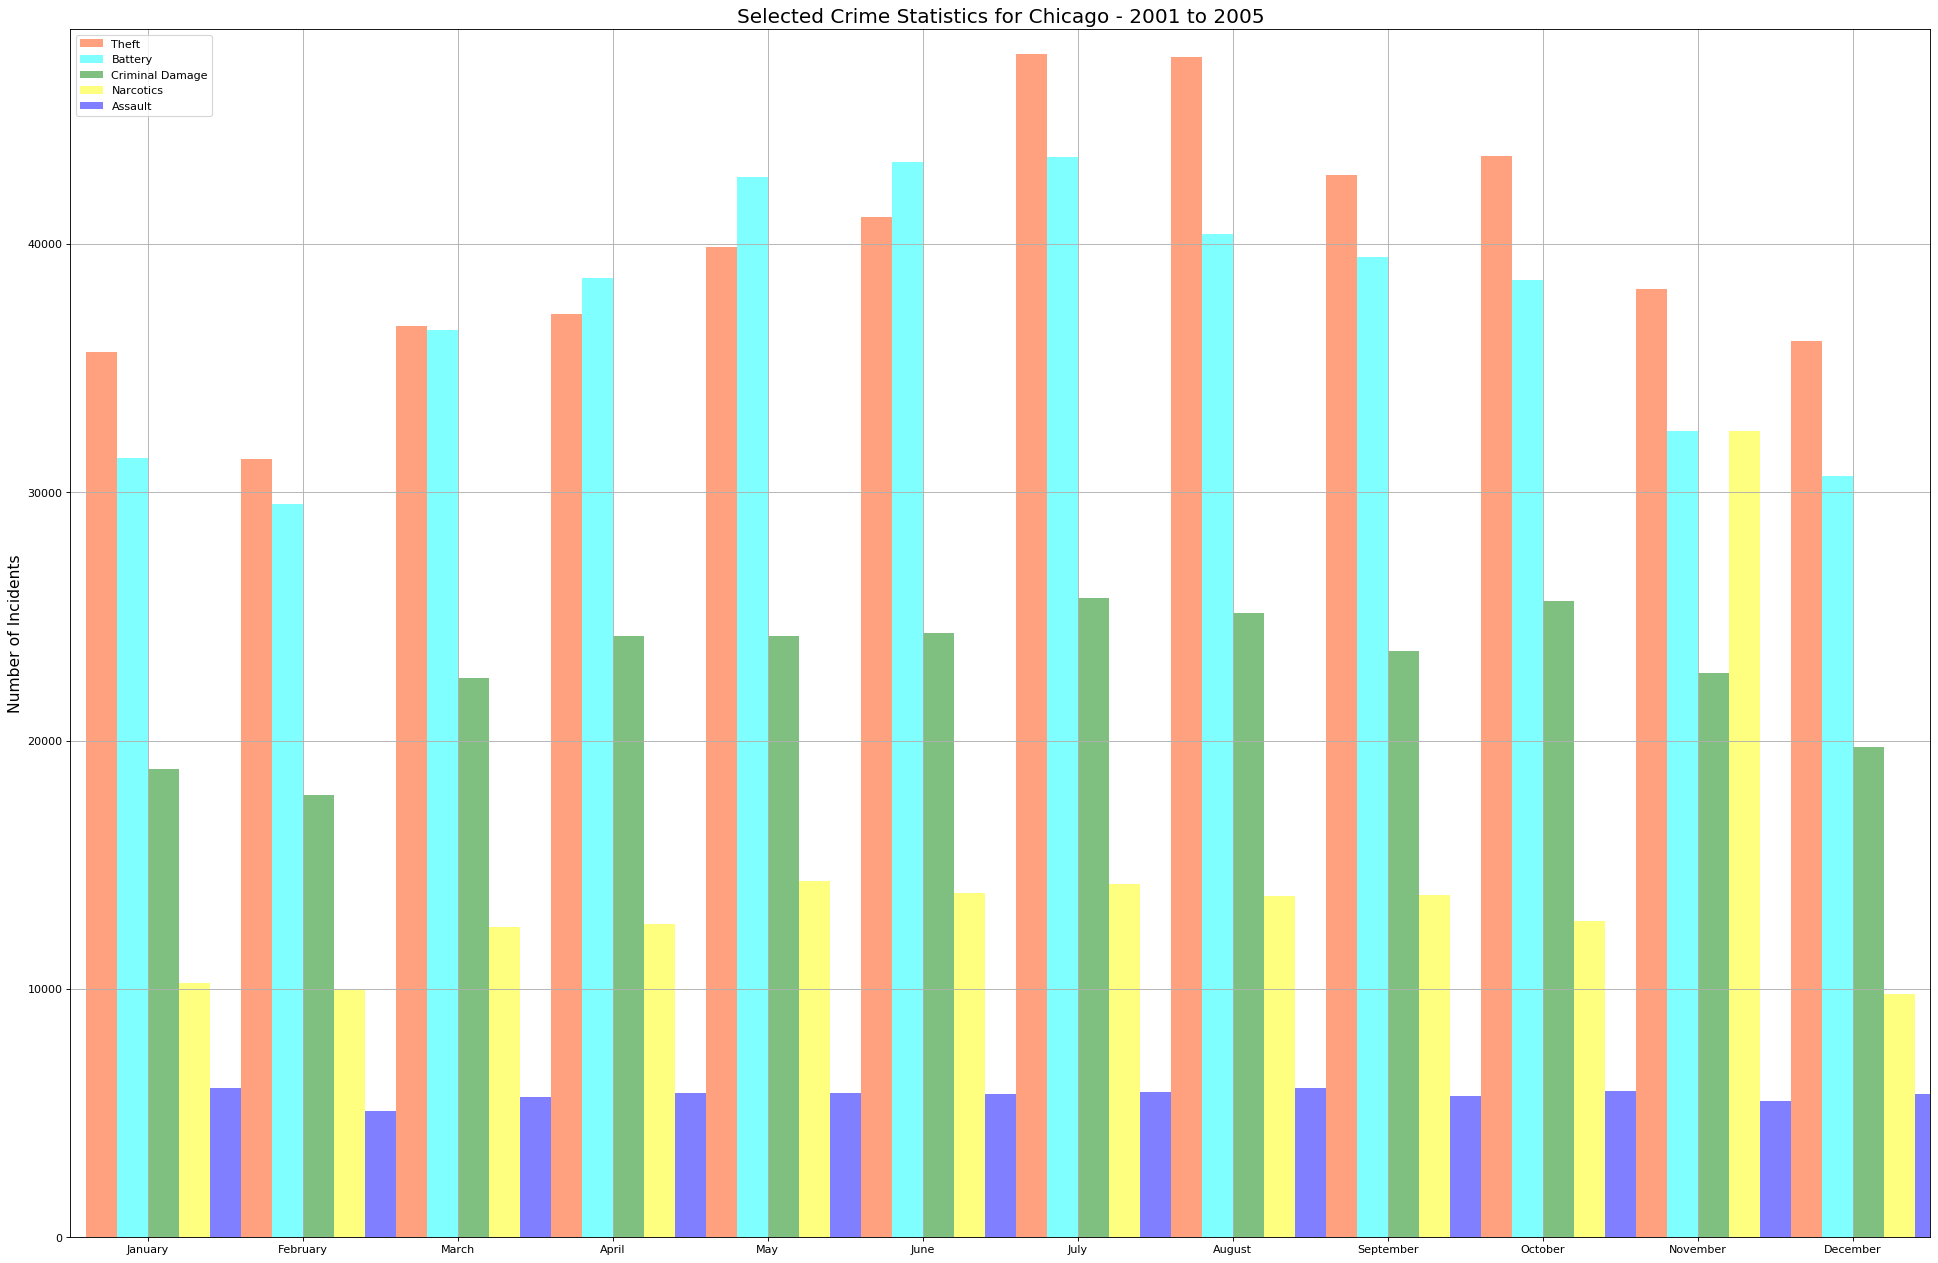

In [76]:
# Define a list "crime_legend" for legend

crime_legend = ["Theft", "Battery", "Criminal Damage", "Narcotics", "Assault"]

#Define the plot

# Setting the positions and width for the bars
pos = list(range(len(top_five_crimes_2001_to_2005['Theft']))) 
width = 0.2 

# Find the highest statistic to determine the scale for y-axis
y_max = max(max(top_five_crimes_2001_to_2005['Theft']), max(top_five_crimes_2001_to_2005['Battery']),
                 max(top_five_crimes_2001_to_2005['Criminal Damage']), max(top_five_crimes_2001_to_2005['Narcotics']),
                 max(top_five_crimes_2001_to_2005['Assault']))+1000

# Plotting the bars
fig, ax = plt.subplots(figsize=(30,20), dpi = 80)

# Create a bar with Theft data,
# in position pos,

plt.bar(pos, 
        #using top_five_crimes_2001_to_2005['Theft'] data,
        top_five_crimes_2001_to_2005['Theft'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='orangered', 
        # with label the first value in the list crime_legend
        label=crime_legend[0])

# Create a bar with Battery data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using top_five_crimes_2001_to_2005['Battery'] data,
        top_five_crimes_2001_to_2005['Battery'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='aqua', 
        # with label the second value in the list crime_legend
        label=crime_legend[1]) 

# Create a bar with Criminal Damage data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using top_five_crimes_2001_to_2005['Criminal Damage'] data,
        top_five_crimes_2001_to_2005['Criminal Damage'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='g', 
        # with label the third value in the list crime_legend
        label=crime_legend[2])

# Create a bar with Assault data,
# in position pos + some width buffer,
plt.bar([p + width*3 for p in pos], 
        #using top_five_crimes_2001_to_2005['Narcotics'] data,
        top_five_crimes_2001_to_2005['Narcotics'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='yellow', 
        # with label the fourth value in the list crime_legend
        label=crime_legend[3])

# Create a bar with Deceptive Practice data,
# in position pos + some width buffer,
plt.bar([p + width*4 for p in pos], 
        #using top_five_crimes_2001_to_2005['Assault'] data,
        top_five_crimes_2001_to_2005['Assault'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='blue', 
        # with label the fifth value in the list crime_legend
        label=crime_legend[4])

# Set the y axis label
ax.set_ylabel('Number of Incidents', fontsize = 14)

# Set the chart's title
ax.set_title('Selected Crime Statistics for Chicago - 2001 to 2005', fontsize = 18)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(top_five_crimes_2001_to_2005['Month'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, y_max])

# Adding the legend and showing the plot
plt.legend(['Theft', 'Battery', 'Criminal Damage','Narcotics','Assault'], loc='upper left')
plt.grid()
plt.show()